## Statistical tests

In [250]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

In [251]:
# load dataset
df= pd.read_csv('all_data_ncopy.csv', index_col=0)
df = df.replace('Carrier_to_ATL','ATL')
df = df.replace('Carrier_to_HAM','Carrier')

In [252]:
df['type'].value_counts()

Carrier         264
HAM_Marianna     94
HAM              56
ATL              49
Name: type, dtype: int64

In [253]:
df.columns

Index(['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24', 'type'], dtype='object')

In [254]:
df['type'].value_counts()

Carrier         264
HAM_Marianna     94
HAM              56
ATL              49
Name: type, dtype: int64

In [255]:
#spearman correlation coefficient
corr = df.corr(method='spearman')

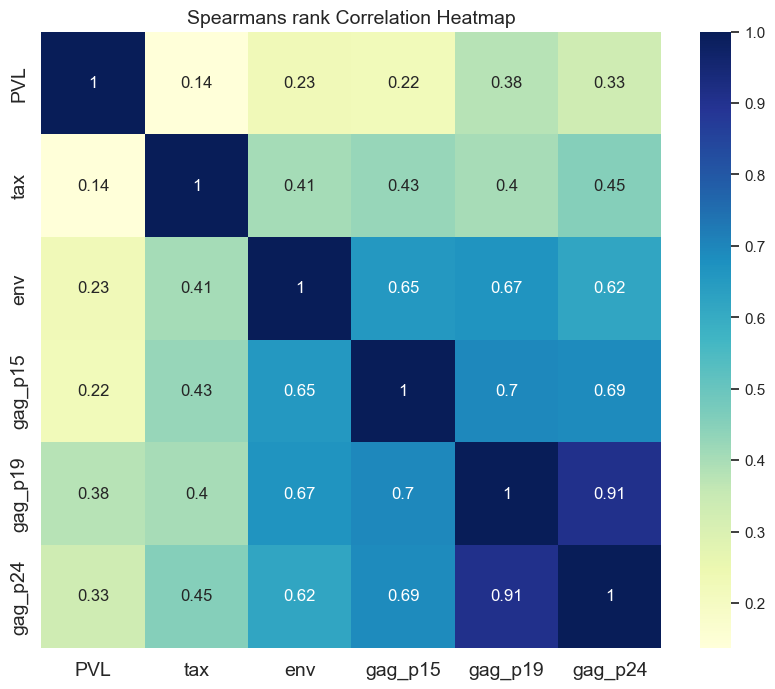

In [256]:
# correlation coefficient heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(corr, cmap='YlGnBu', annot=True, annot_kws={'size': 12}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
plt.title('Spearmans rank Correlation Heatmap', fontsize=14)
plt.show()

### Effect size analysis

In [257]:
from itertools import combinations
from scipy import stats
from statsmodels.stats.power import TTestIndPower

In [258]:
df = pd.read_csv('all_data_ncopy.csv', index_col=0)
df = df.replace('Carrier_to_ATL','ATL')
df = df.replace('Carrier_to_HAM','Carrier')

In [259]:
# Cohen's d effect size function
def calculate_cohens_d(group1, group2):
    # mean of two groups
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)

    # pooled std. deviation
    n1 = len(group1)
    n2 = len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_std = np.sqrt(pooled_var)

    # Calculate Cohen's d
    cohens_d = (mean1 - mean2) / pooled_std

    return cohens_d

In [260]:
df.columns

Index(['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24', 'type'], dtype='object')

In [261]:
filtered_df = df[df['type'] != 'ATL']

In [262]:
# Get unique groups 
groups = filtered_df['type'].unique()

In [263]:
groups

array(['Carrier', 'HAM', 'HAM_Marianna'], dtype=object)

In [264]:
# Cohen's d for pairwise combination of groups and features
effect_sizes = {}
for feature in ['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24']:
    for group1, group2 in combinations(groups, 2):
        cohens_d = calculate_cohens_d(df[df['type'] == group1][feature], df[df['type'] == group2][feature])
        key = f"{feature} ({group1} vs {group2})"
        effect_sizes[key] = cohens_d

# Effect size values
for key, value in effect_sizes.items():
    print(f"{key}: {value}")

PVL (Carrier vs HAM): -0.5882025064243908
PVL (Carrier vs HAM_Marianna): -0.04641460741337493
PVL (HAM vs HAM_Marianna): 0.639993172769175
tax (Carrier vs HAM): -0.9717530125773796
tax (Carrier vs HAM_Marianna): -1.0013603994717641
tax (HAM vs HAM_Marianna): -0.07186840365978614
env (Carrier vs HAM): -0.1847360215616701
env (Carrier vs HAM_Marianna): -2.0744763843048952
env (HAM vs HAM_Marianna): -1.9140977326053707
gag_p15 (Carrier vs HAM): -0.7813702646129653
gag_p15 (Carrier vs HAM_Marianna): -0.9943087361443169
gag_p15 (HAM vs HAM_Marianna): -0.08774131081755136
gag_p19 (Carrier vs HAM): -0.8111929876925722
gag_p19 (Carrier vs HAM_Marianna): -1.6203974370710792
gag_p19 (HAM vs HAM_Marianna): -0.681764049503237
gag_p24 (Carrier vs HAM): -0.9541581949289952
gag_p24 (Carrier vs HAM_Marianna): -1.3142670842289697
gag_p24 (HAM vs HAM_Marianna): -0.2585887106101562


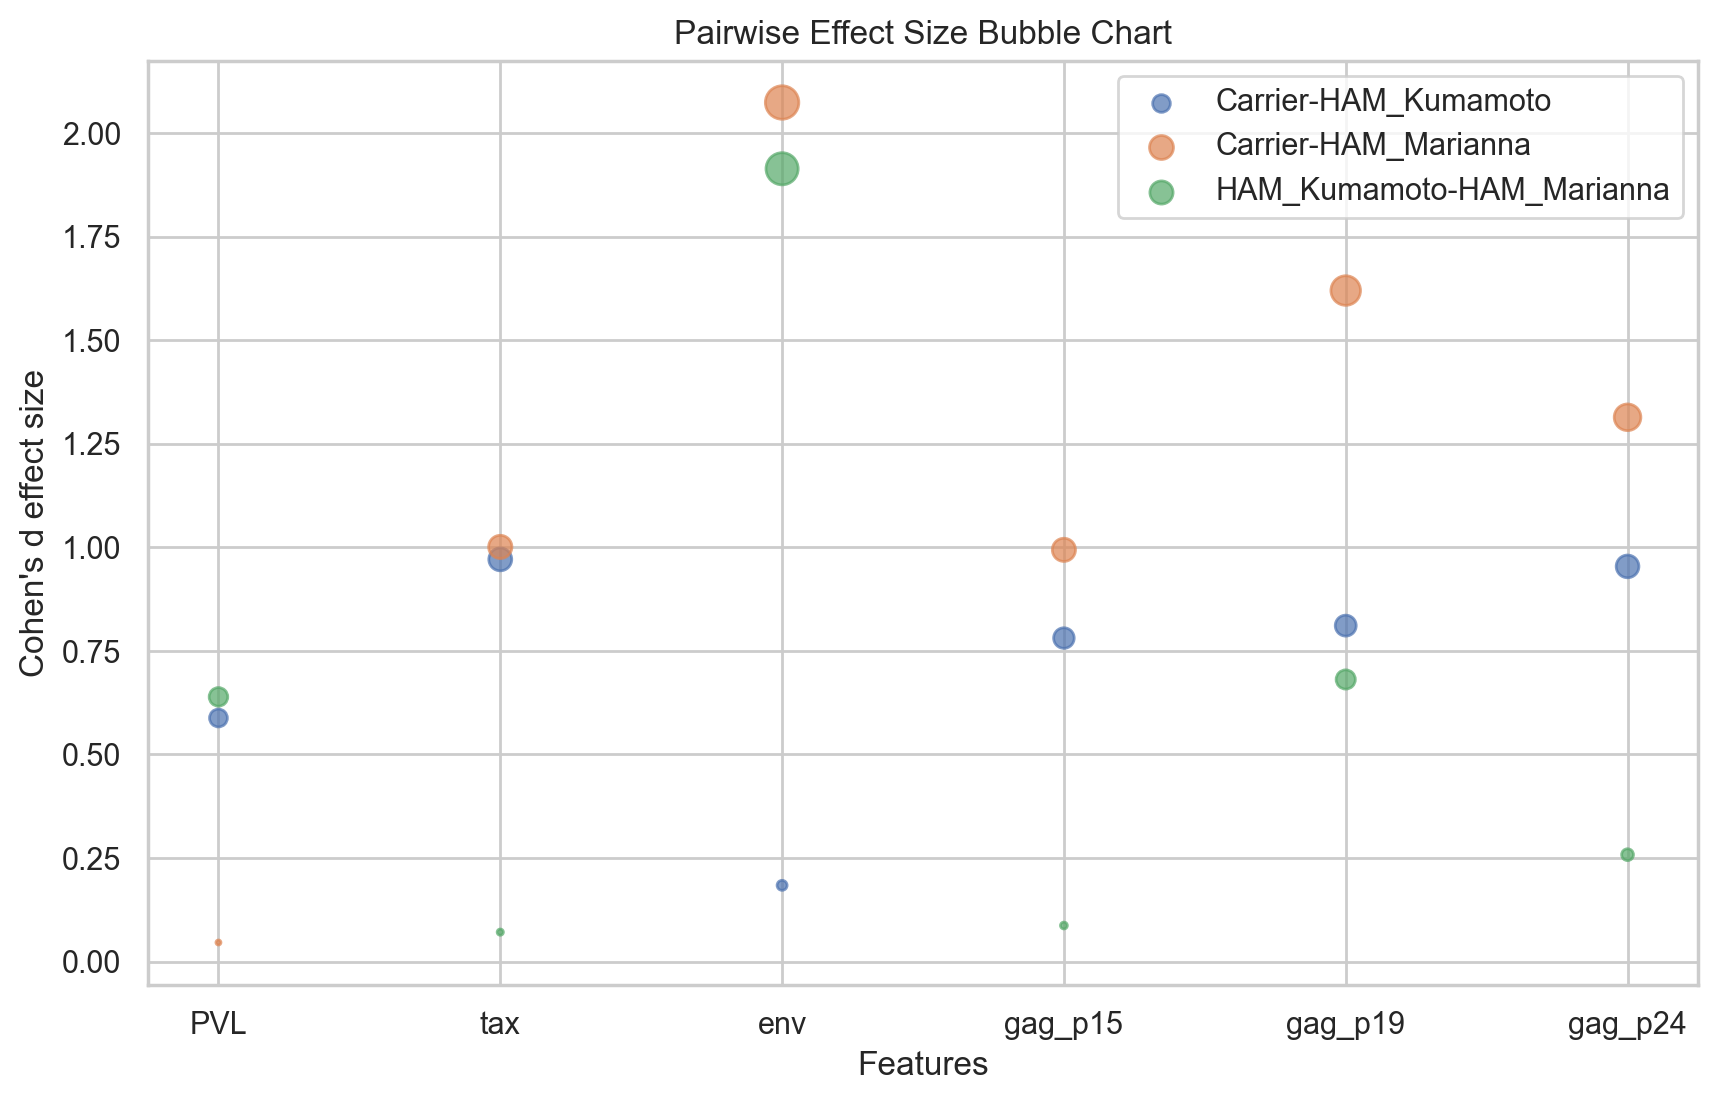

In [265]:
# Pairwise effect size results
eds = {
    'Carrier-HAM_Kumamoto': [0.588, 0.971, 0.184, 0.781, 0.811, 0.954],
    'Carrier-HAM_Marianna': [0.046, 1.001, 2.074, 0.994, 1.620, 1.314],
    'HAM_Kumamoto-HAM_Marianna': [0.639, 0.071, 1.914, 0.087, 0.681, 0.258],
    
}

eds_data = pd.DataFrame(eds, index=['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24'])

# Bubble Chart
plt.figure(figsize=(10, 6), dpi=200)
for column in eds_data.columns:
    plt.scatter(eds_data.index, eds_data[column], s=(eds_data[column].abs() * 70), alpha=0.7, label=column)

plt.title('Pairwise Effect Size Bubble Chart')
plt.xlabel('Features')
plt.ylabel('Cohen\'s d effect size')
plt.legend()
plt.show()

In [266]:
# Initiate power analysis
power_analysis = TTestIndPower()

In [267]:
# HAM_K vs HAM_M_(sample_size=21)
sample_size = power_analysis.solve_power(effect_size= 1.914, alpha= 0.05, nobs1=None, ratio= 0.126, power= 0.8, alternative='two-sided')

In [268]:
sample_size

20.997243819323636

Suggested minimum number of samples required to see an effect of the the desired size.

### Kruskal-Wallis test

In [269]:
import scipy.stats as stats
import scikit_posthocs as sp
import statsmodels.stats.multicomp as mc

In [270]:
df.columns

Index(['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24', 'type'], dtype='object')

In [271]:
df['type'].value_counts()

Carrier         264
HAM_Marianna     94
HAM              56
ATL              49
Name: type, dtype: int64

In [272]:
# set random seed
random_seed = 0

In [273]:
# Dataframe for each of the groups
group_names = ['HAM', 'Carrier', 'HAM_Marianna']
groups = [df[df['type'] == group_name] for group_name in group_names if group_name != 'ATL']

In [274]:
# number of iterations
num_iterations = 50

In [275]:
# Create dictionaries to store test results
kruskal_results = {}
posthoc_p_values = {}

In [276]:
# Kruskal-Wallis Test
for i in range(num_iterations):
    #sample_size from power test
    sample_size = 21
    resampled_groups = [group.sample(n=sample_size, replace=True, random_state=i) for group in groups]

    # Combine the resampled groups into a new dataset
    resampled_data = pd.concat(resampled_groups)

    # Perform Kruskal-Wallis test for each of the features
    numerical_features = ['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24']
    for feature in numerical_features:
        kruskal_statistic, p_value = stats.kruskal(
            *[resampled_data[resampled_data['type'] == type][feature] for type in group_names]
        )
        if feature not in kruskal_results:
            kruskal_results[feature] = {'Kruskal Statistic': [], 'p-value': []}
        kruskal_results[feature]['Kruskal Statistic'].append(kruskal_statistic)
        kruskal_results[feature]['p-value'].append(p_value)

In [277]:
# Calculate the mean Kruskal-Wallis results across iterations
for feature, result in kruskal_results.items():
    result['Mean Kruskal Statistic'] = np.mean(result['Kruskal Statistic'])
    result['Mean p-value'] = np.mean(result['p-value'])

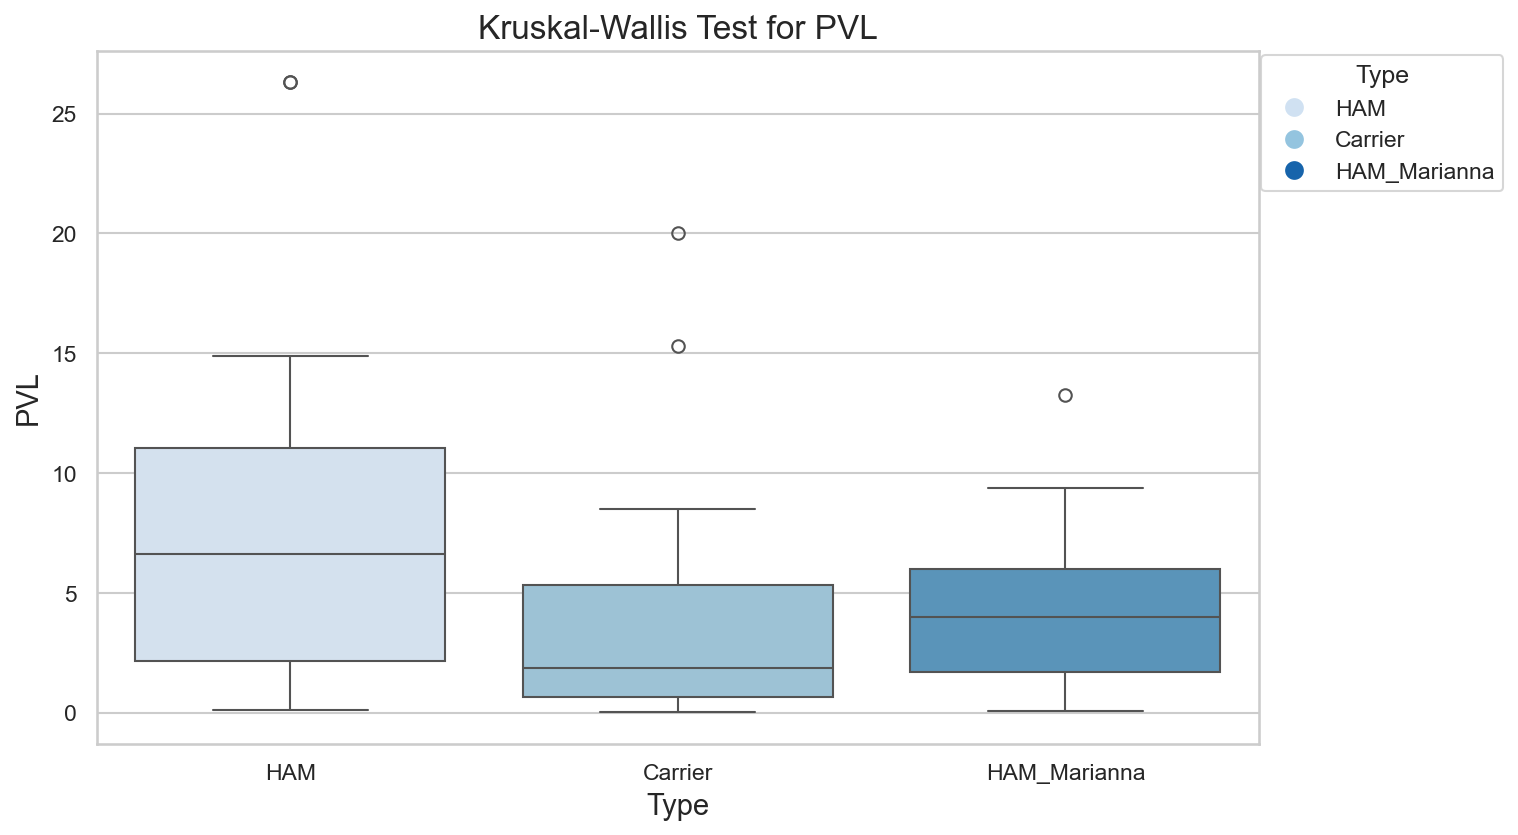

Mean Kruskal-Wallis Test for PVL:
Mean Kruskal Statistic: 8.0036
Mean p-value: 0.1140




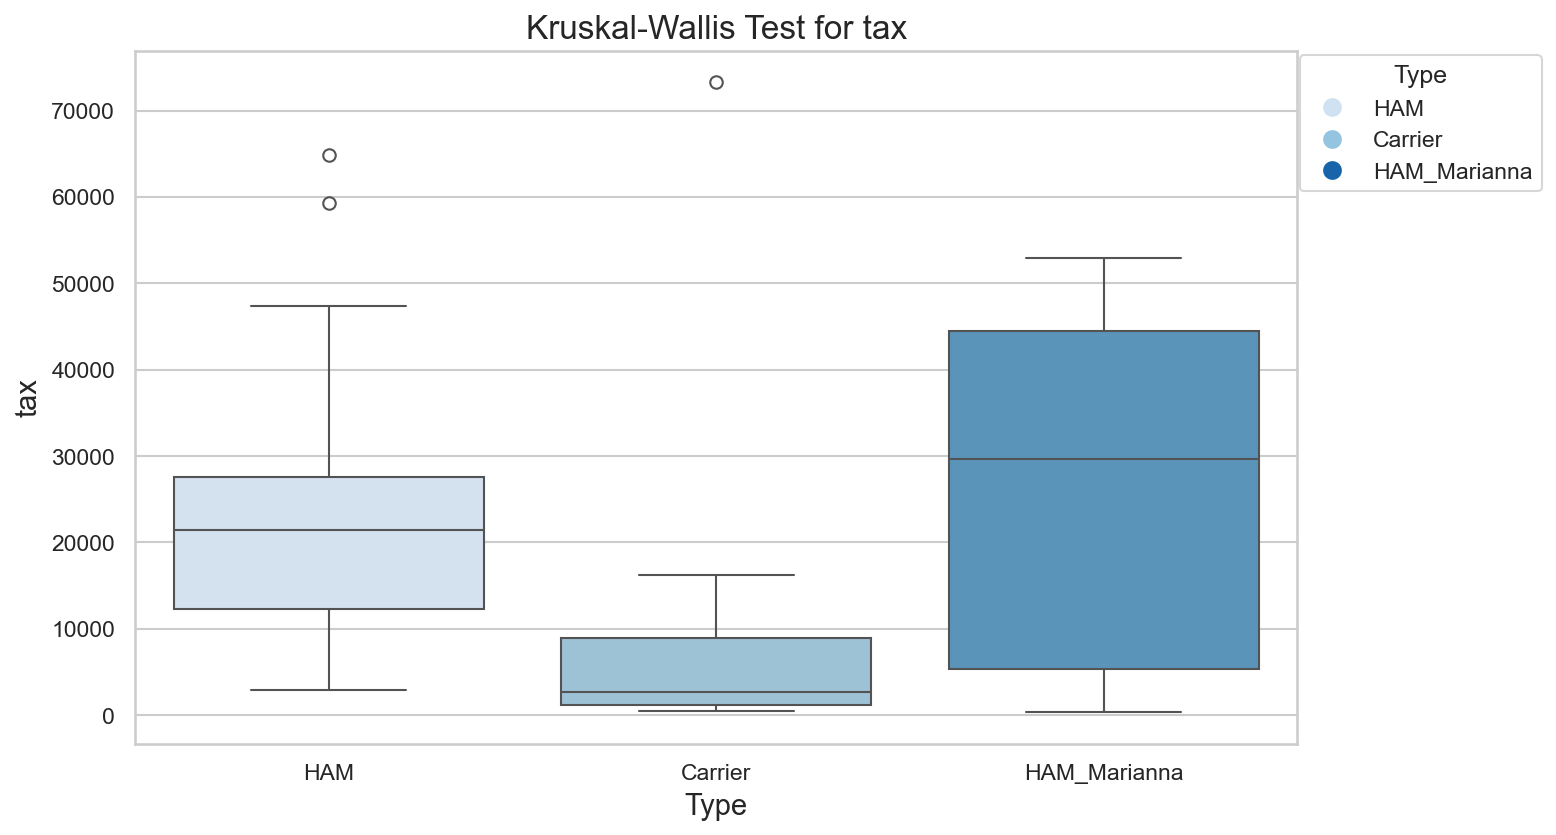

Mean Kruskal-Wallis Test for tax:
Mean Kruskal Statistic: 17.6079
Mean p-value: 0.0039




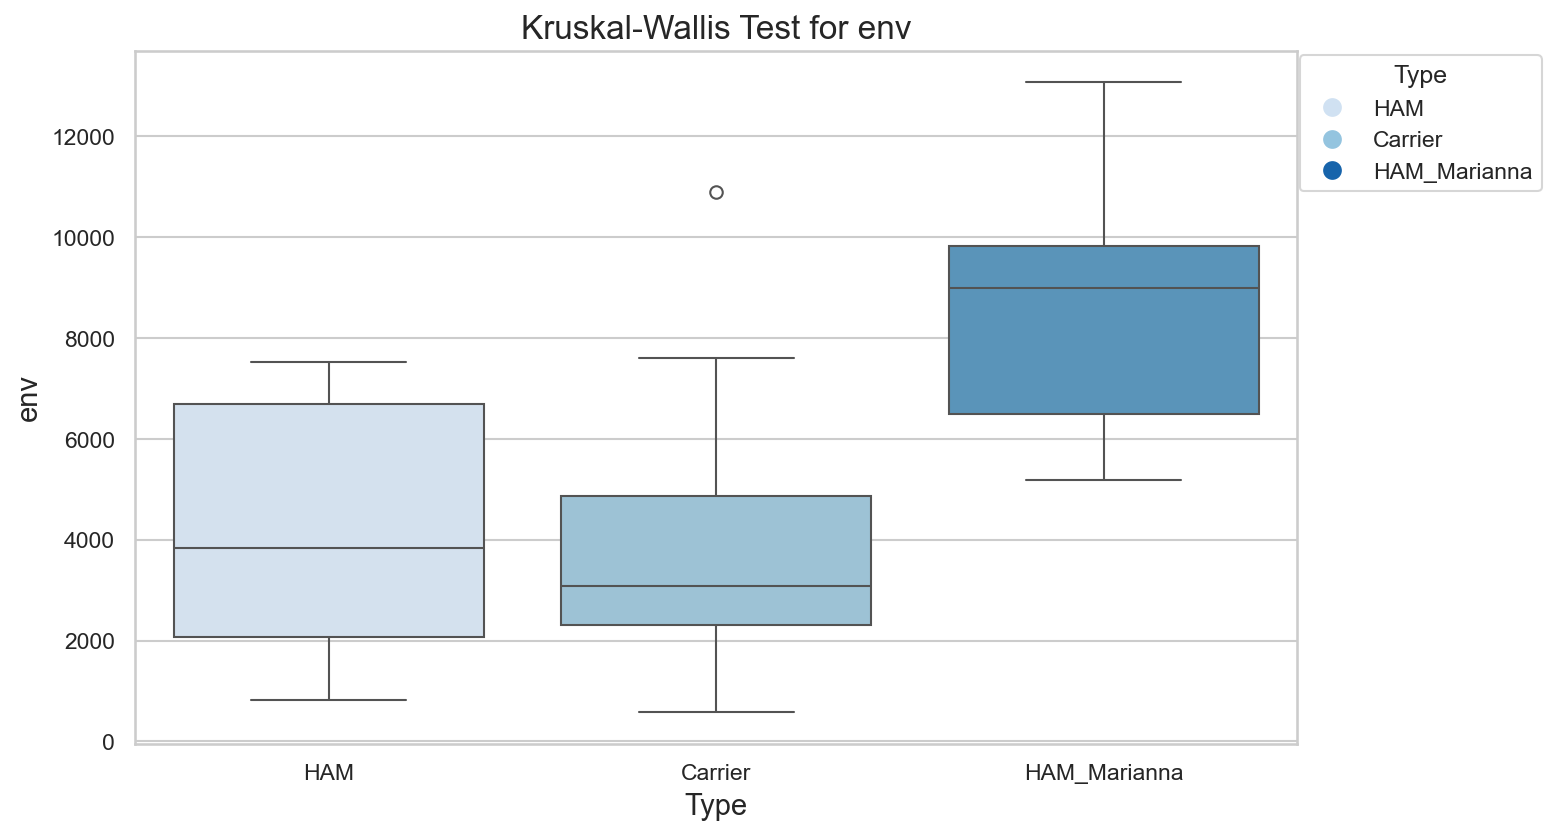

Mean Kruskal-Wallis Test for env:
Mean Kruskal Statistic: 29.6789
Mean p-value: 0.0000




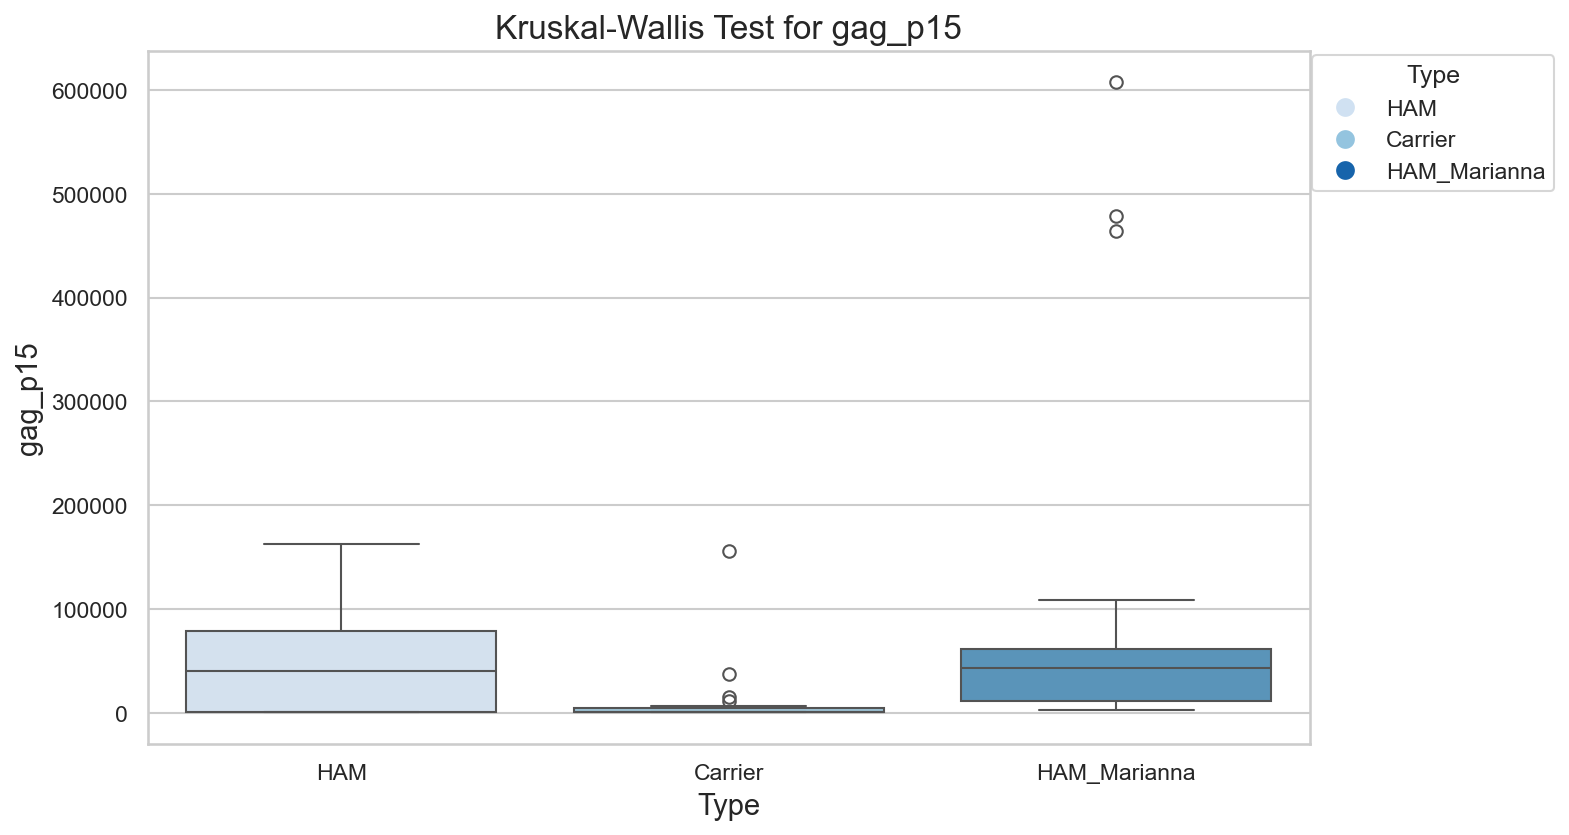

Mean Kruskal-Wallis Test for gag_p15:
Mean Kruskal Statistic: 17.6247
Mean p-value: 0.0019




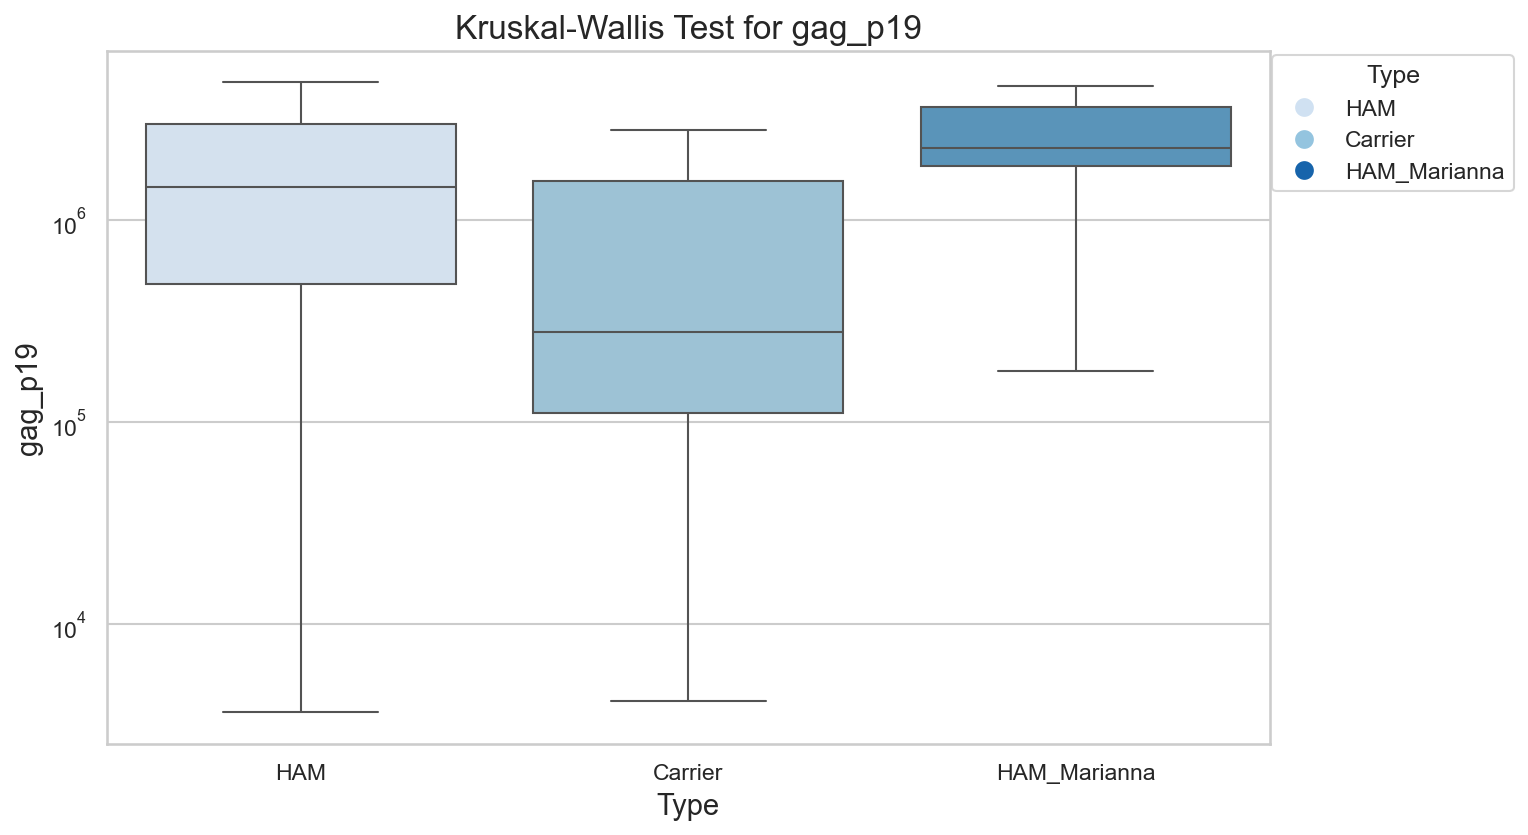

Mean Kruskal-Wallis Test for gag_p19:
Mean Kruskal Statistic: 17.8990
Mean p-value: 0.0014




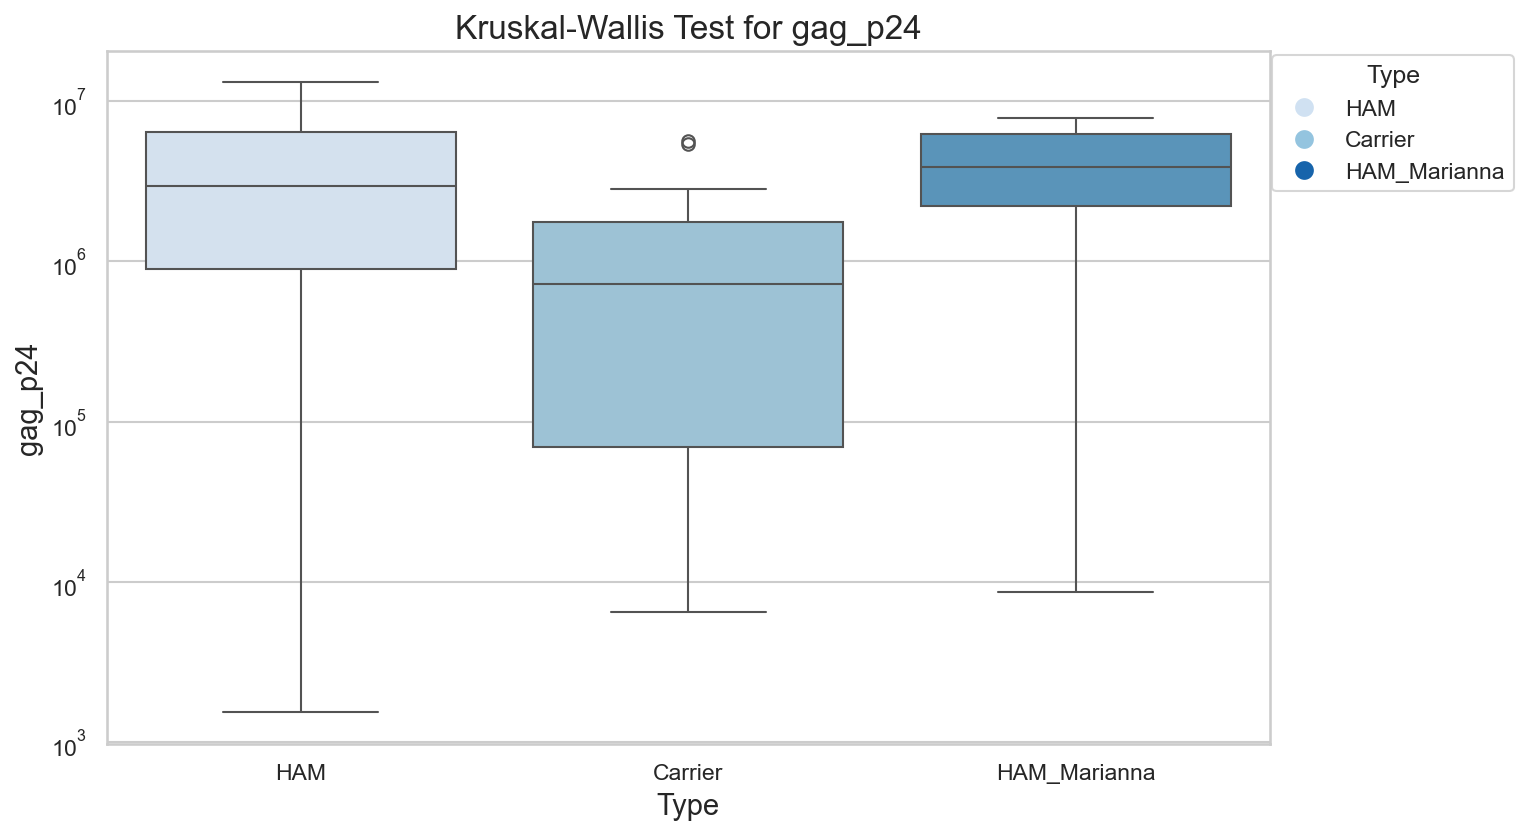

Mean Kruskal-Wallis Test for gag_p24:
Mean Kruskal Statistic: 15.2835
Mean p-value: 0.0035




In [278]:
# custom color with shades of blue
custom_palette = sns.color_palette("Blues", 4)

# Visualize Kruskal-Wallis test results
for feature, result in kruskal_results.items():
    plt.figure(figsize=(10, 6), dpi=150) 
    sns.set_style('whitegrid')

    # Use the custom color palette
    sns.boxplot(data=resampled_data, x='type', y=feature, order=group_names, palette=custom_palette)

    plt.title(f'Kruskal-Wallis Test for {feature}', fontsize=16)  
    plt.xlabel('Type', fontsize=14)
    plt.ylabel(feature, fontsize=14) 

    # Legend for the custom colors
    color_legend = [plt.Line2D([0], [0], marker='o', color='w', label='HAM', markerfacecolor=custom_palette[0], markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Carrier', markerfacecolor=custom_palette[1], markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='HAM_Marianna', markerfacecolor=custom_palette[3], markersize=10)]

    plt.legend(handles=color_legend, title='Type', loc='upper right', bbox_to_anchor=(1.22, 1.01), title_fontsize=12) 

    # Check if it's the last two plots, and set y-axis in log scale
    if feature in ['gag_p19', 'gag_p24']:
        plt.yscale('log')

    plt.show()

    print(f'Mean Kruskal-Wallis Test for {feature}:')
    print(f'Mean Kruskal Statistic: {result["Mean Kruskal Statistic"]:.4f}')
    print(f'Mean p-value: {result["Mean p-value"]:.4f}')
    print('\n')

### Dunn's Post-Hoc Test

In [279]:
# random seed for Dunn's test
np.random.seed(random_seed)

In [280]:
# Resample the larger groups to match the smallest group's size on the full dataset
sample_size = 21
resampled_groups = [group.sample(n=sample_size, replace=True, random_state=i) for group in groups]

In [281]:
# perform Dunn's post hoc test
for feature in numerical_features:
    posthoc_p_value = sp.posthoc_dunn(
        [resampled_data[resampled_data['type'] == type][feature] for type in group_names], 
        p_adjust='bonferroni'
    )
    posthoc_p_values[feature] = posthoc_p_value

In [282]:
for feature, p_values in posthoc_p_values.items():
    print(f"Dunn's Test for {feature}:")
    for i, group1 in enumerate(group_names):
        for j, group2 in enumerate(group_names):
            if i < j:
                p_value = p_values.iloc[i, j]
                if p_value < 0.05:  
                    print(f"    {group1} vs. {group2}: Significant (p = {p_value:.4f})")
                else:
                    print(f"    {group1} vs. {group2}: Not Significant (p = {p_value:.4f})")

Dunn's Test for PVL:
    HAM vs. Carrier: Not Significant (p = 0.0605)
    HAM vs. HAM_Marianna: Not Significant (p = 0.3348)
    Carrier vs. HAM_Marianna: Not Significant (p = 1.0000)
Dunn's Test for tax:
    HAM vs. Carrier: Significant (p = 0.0008)
    HAM vs. HAM_Marianna: Not Significant (p = 1.0000)
    Carrier vs. HAM_Marianna: Significant (p = 0.0007)
Dunn's Test for env:
    HAM vs. Carrier: Not Significant (p = 1.0000)
    HAM vs. HAM_Marianna: Significant (p = 0.0001)
    Carrier vs. HAM_Marianna: Significant (p = 0.0000)
Dunn's Test for gag_p15:
    HAM vs. Carrier: Significant (p = 0.0240)
    HAM vs. HAM_Marianna: Not Significant (p = 0.5179)
    Carrier vs. HAM_Marianna: Significant (p = 0.0002)
Dunn's Test for gag_p19:
    HAM vs. Carrier: Not Significant (p = 0.0605)
    HAM vs. HAM_Marianna: Not Significant (p = 0.1746)
    Carrier vs. HAM_Marianna: Significant (p = 0.0001)
Dunn's Test for gag_p24:
    HAM vs. Carrier: Significant (p = 0.0177)
    HAM vs. HAM_Marianna

### VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
df.columns

Index(['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24', 'type'], dtype='object')

In [51]:
# variables
var = df[['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24']]

In [52]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Features'] = var.columns
vif_data['VIF score'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]

In [53]:
vif_data

,Features,VIF score
0,PVL,1.116059
1,tax,2.135333
2,env,4.608828
3,gag_p15,1.492009
4,gag_p19,10.951153
5,gag_p24,8.398931


## Anomaly detection

In [54]:
from sklearn.ensemble import IsolationForest

In [55]:
# Load data
df = pd.read_csv('all_data_ncopy.csv', index_col=0)
df = df.replace('Carrier_to_ATL','ATL')
df = df.replace('Carrier_to_HAM','Carrier')

In [56]:
df.head()

,PVL,tax,env,gag_p15,gag_p19,gag_p24,type
indivID,,,,,,,
indiv0001,4.6,520.0,272.0,260.0,99954.0,13909.0,Carrier
indiv0002,0.2,1628.0,126.0,172.0,27483.0,6809.0,Carrier
indiv0003,0.1,2238.0,290.0,156.0,151627.0,761360.0,Carrier
indiv0004,1.2,4787.0,726.0,422.0,42721.0,603196.0,Carrier
indiv0005,7.5,912.0,2292.0,278.0,948739.0,792544.0,Carrier


In [57]:
df['type'].value_counts()

Carrier         264
HAM_Marianna     94
HAM              56
ATL              49
Name: type, dtype: int64

In [58]:
df.columns

Index(['PVL', 'tax', 'env', 'gag_p15', 'gag_p19', 'gag_p24', 'type'], dtype='object')

In [59]:
len(df)

463

In [60]:
#drop gag_p19
df.drop('gag_p19', axis=1, inplace= True)

In [61]:
# Map the 'type' feature to binary values
df['target'] = df['type'].map({'Carrier': 0, 'ATL': 1, 'HAM': 2, 'HAM_Marianna': 2})

In [62]:
# Filter the Carriers 
carrier_df = df[df['target'] == 0]

In [63]:
len(carrier_df)

264

In [64]:
# Separate the features for Carrier
X_carrier = carrier_df.drop(['type','target'], axis=1)

In [65]:
len(X_carrier)

264

In [66]:
# Create Isolation Forest model 
iforest = IsolationForest(contamination= 0.2, max_samples = 'auto', n_estimators= 300, random_state= 95)

In [67]:
# fit the model
iforest.fit(X_carrier)

IsolationForest(contamination=0.2, n_estimators=300, random_state=95)

In [68]:
# anomaly score calculation
anomaly_scores = iforest.decision_function(X_carrier)

In [69]:
len(anomaly_scores)

264

In [70]:
#anomaly_scores

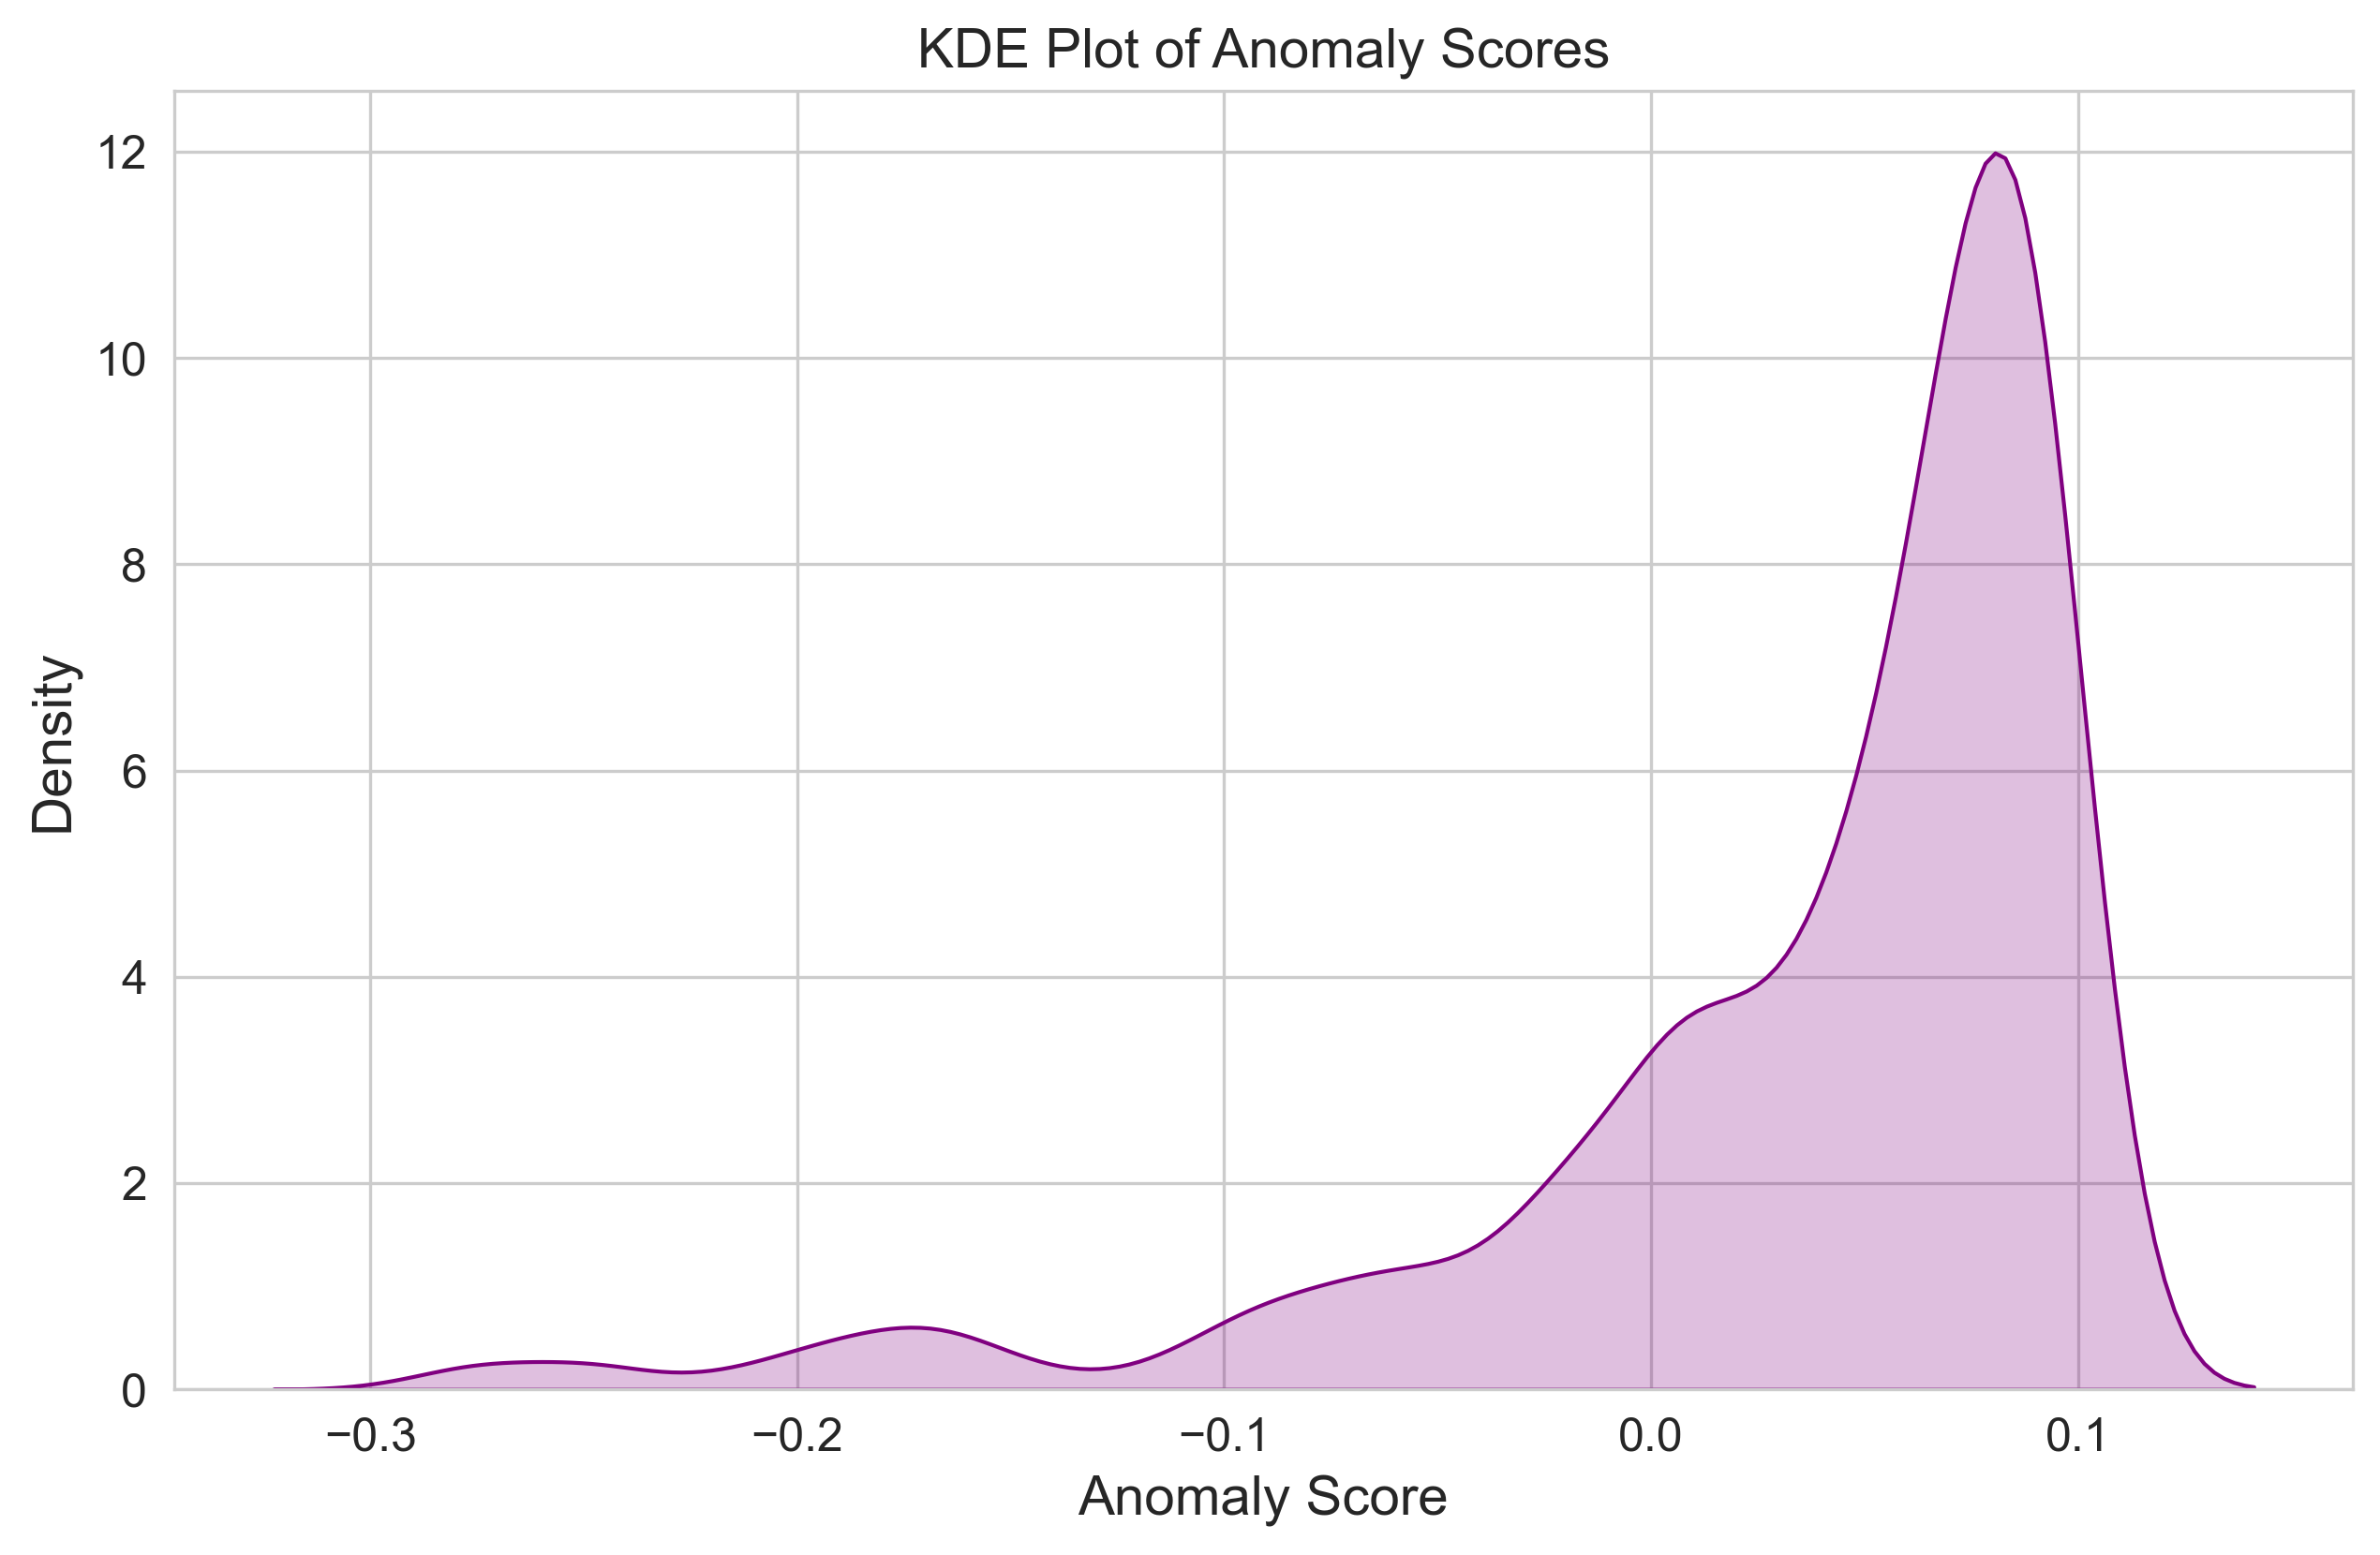

In [71]:
# visualization of anomaly score distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6), dpi=300)
sns.kdeplot(anomaly_scores, color="purple", shade=True, bw_method=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel('Anomaly Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE Plot of Anomaly Scores', fontsize=14)
plt.show()

In [72]:
# set a threshold
threshold = -0.05

In [73]:
# get the indices of actual anomalies
anomaly_indices = [index for index, score in enumerate(anomaly_scores) if score < threshold]

# get the actual anomalies from the dataset
actual_anomalies = X_carrier.iloc[anomaly_indices]

In [74]:
len(actual_anomalies)

30

In [75]:
min_ano_score = anomaly_scores.min()

In [76]:
max_ano_score = anomaly_scores.max()

In [77]:
min_ano_score, max_ano_score

(-0.27836241825744573, 0.09684728829319877)

In [78]:
anomaly_scores_plot = np.sort(anomaly_scores)

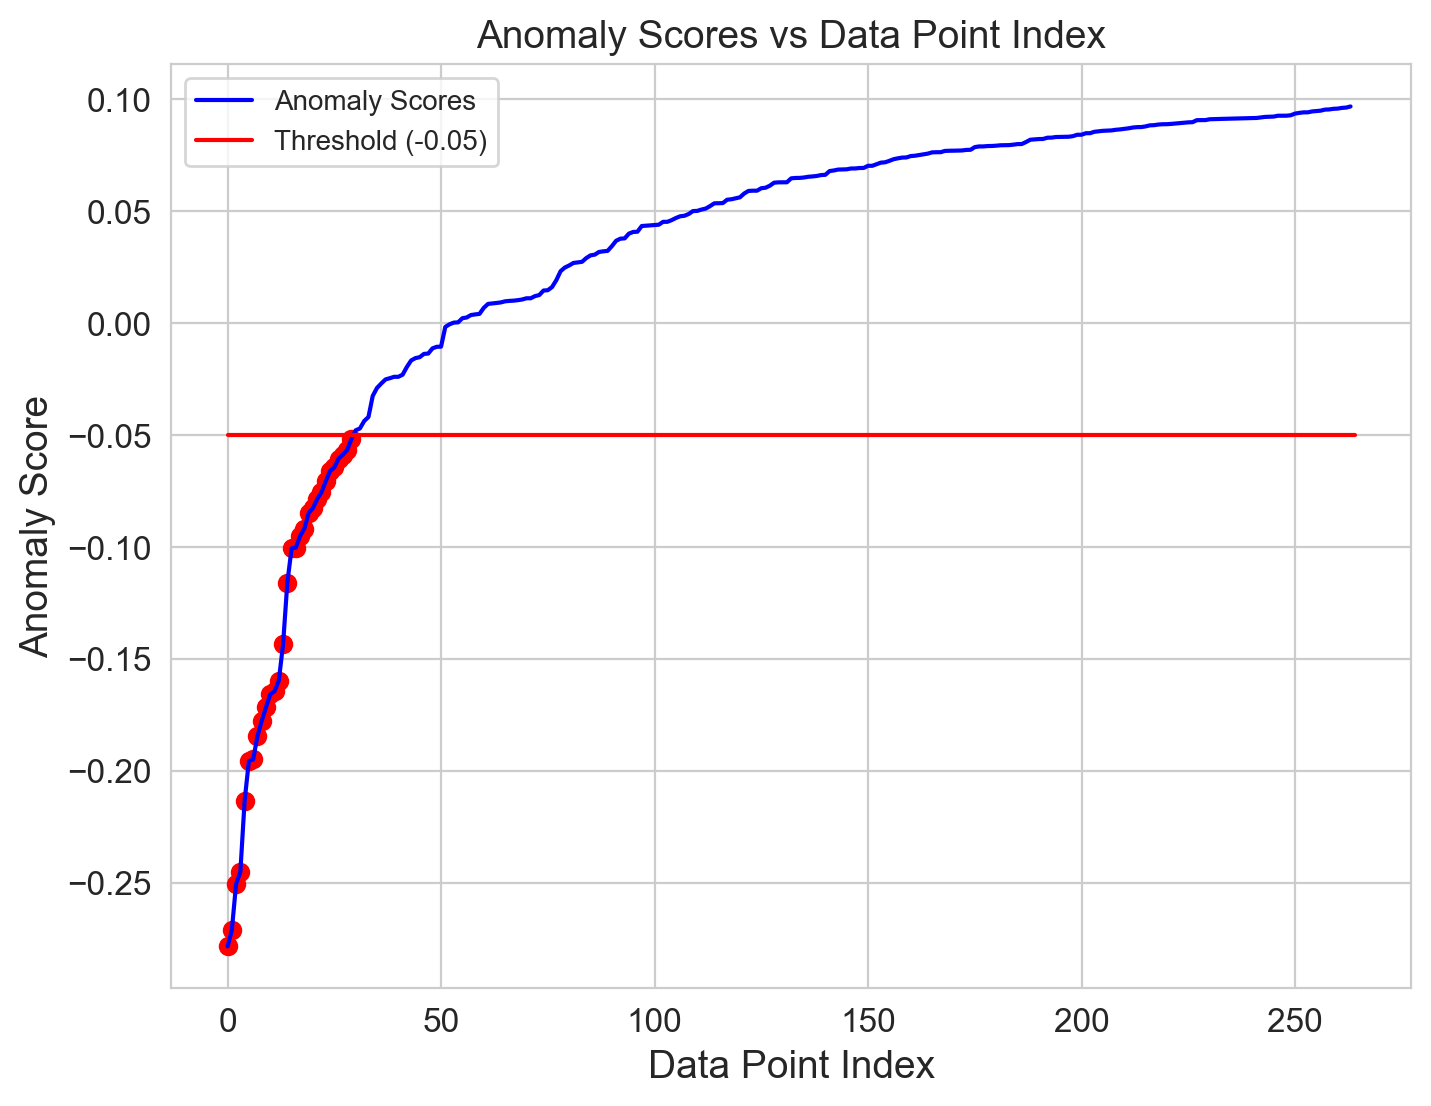

In [79]:
# line for the threshold
threshold = -0.05
plt.figure(figsize=(8,6), dpi=200)
plt.plot(anomaly_scores_plot, color="blue", label="Anomaly Scores")
plt.plot([0, len(anomaly_scores_plot)], [threshold, threshold], color="red", label="Threshold (-0.05)")

# label the anomalies
plt.scatter(np.where(anomaly_scores_plot < threshold)[0], anomaly_scores_plot[np.where(anomaly_scores_plot <= threshold)[0]], color="red", marker="o")

# set title
plt.title("Anomaly Scores vs Data Point Index", fontsize=14)
plt.xlabel("Data Point Index", fontsize=14)
plt.ylabel("Anomaly Score", fontsize=14)

# add legends
plt.legend(fontsize=10)

# plot the graph
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

In [80]:
X_carrier

,PVL,tax,env,gag_p15,gag_p24
indivID,,,,,
indiv0001,4.60,520.000000,272.000000,260.000000,1.390900e+04
indiv0002,0.20,1628.000000,126.000000,172.000000,6.809000e+03
indiv0003,0.10,2238.000000,290.000000,156.000000,7.613600e+05
indiv0004,1.20,4787.000000,726.000000,422.000000,6.031960e+05
indiv0005,7.50,912.000000,2292.000000,278.000000,7.925440e+05
indiv0006,5.40,3038.000000,742.000000,180.000000,2.857900e+04
indiv0007,15.10,2484.000000,1102.000000,516.000000,3.320240e+05
indiv0008,0.50,2294.000000,480.000000,17248.000000,3.798896e+06
indiv0009,0.60,4208.000000,616.000000,512.000000,1.017315e+06


In [81]:
anomalous_data = actual_anomalies.copy()

In [82]:
# create'Anomaly_Score' column in the DataFrame
actual_anomalies['Anomaly_Score'] = anomaly_scores[anomaly_indices]

/var/folders/_4/p4p8llrs7s97qrcpyfmwrnx00000gn/T/ipykernel_63922/3013610172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_anomalies['Anomaly_Score'] = anomaly_scores[anomaly_indices]


In [83]:
len(actual_anomalies)

30

In [84]:
actual_anomalies

,PVL,tax,env,gag_p15,gag_p24,Anomaly_Score
indivID,,,,,,
indiv0010,22.50,17410.000000,5097.000000,1540.000000,3.644769e+06,-0.075456
indiv0012,2.50,66612.000000,788.000000,256.000000,1.095728e+06,-0.078529
indiv0027,35.10,46360.600000,8036.570000,133435.500000,9.186793e+06,-0.278362
indiv0035,46.30,6257.360000,3380.860000,1392.000000,5.574657e+05,-0.171580
indiv0049,3.91,5803.662000,4416.000000,51426.477000,7.371510e+06,-0.058702
indiv0055,1.29,38118.972000,3910.400000,21345.528000,4.946663e+06,-0.056640
indiv0069,2.73,5475.765000,6935.648000,334938.483000,1.029821e+07,-0.245091
indiv0070,0.34,66137.340000,2501.280000,493.614000,2.403575e+06,-0.066068
indiv0075,1.79,7473.845000,3674.720000,56884.113000,7.233097e+06,-0.064411


In [85]:
#pearson correlation coefficient
ascor = actual_anomalies.corr()

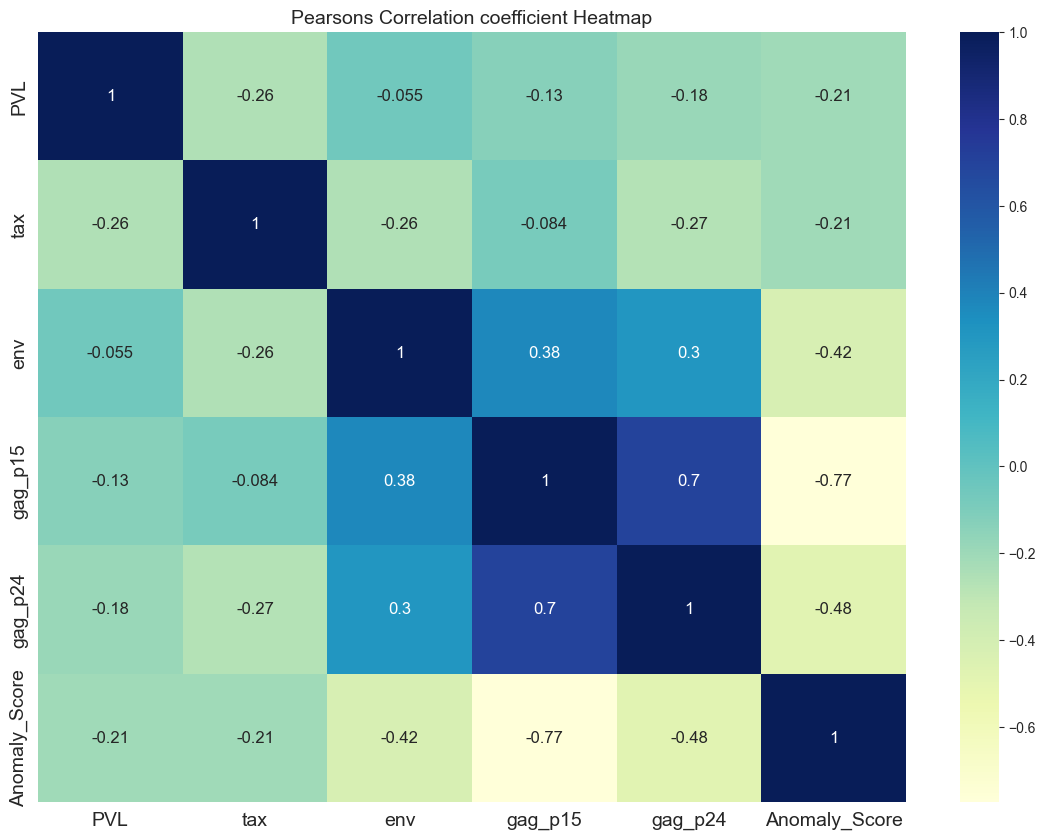

In [86]:
# correlation coefficient heatmap
fig, ax = plt.subplots(figsize=(14, 10))
heatmap = sns.heatmap(ascor, cmap='YlGnBu', annot=True, annot_kws={'size': 12}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
plt.title('Pearsons Correlation coefficient Heatmap', fontsize=14)
plt.show()

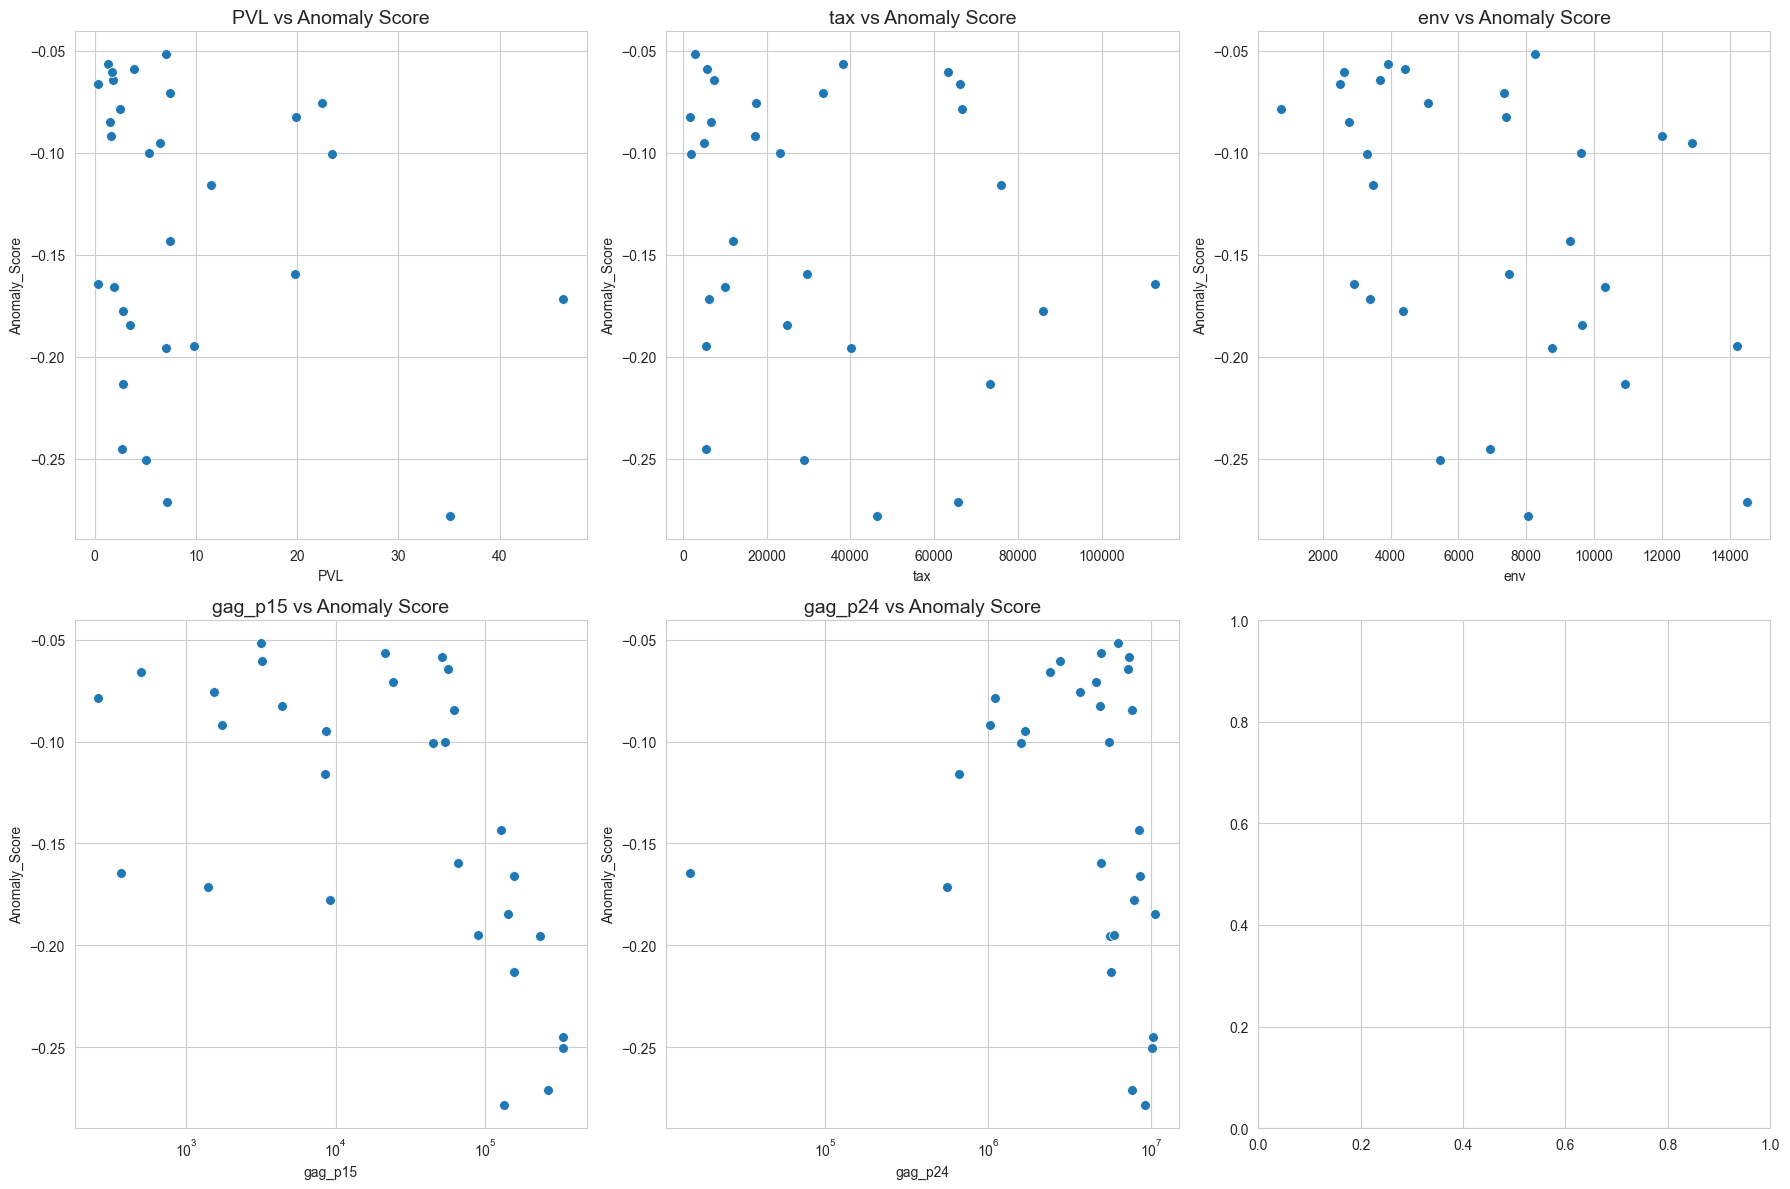

In [87]:
# figure setup
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting each feature against anomaly score
sns.scatterplot(x='PVL', y='Anomaly_Score', data=actual_anomalies, ax=axes[0, 0], s=50)
axes[0, 0].set_title('PVL vs Anomaly Score', fontsize=14)
#axes[0, 0].set_xscale('log')

sns.scatterplot(x='tax', y='Anomaly_Score', data=actual_anomalies, ax=axes[0, 1], s=50)
axes[0, 1].set_title('tax vs Anomaly Score', fontsize=14)
#axes[0, 1].set_xscale('log')

sns.scatterplot(x='env', y='Anomaly_Score', data=actual_anomalies, ax=axes[0, 2], s=50)
axes[0, 2].set_title('env vs Anomaly Score', fontsize=14)
#axes[0, 2].set_xscale('log')

sns.scatterplot(x='gag_p15', y='Anomaly_Score', data=actual_anomalies, ax=axes[1, 0], s=50)
axes[1, 0].set_title('gag_p15 vs Anomaly Score', fontsize=14)
axes[1, 0].set_xscale('log')

sns.scatterplot(x='gag_p24', y='Anomaly_Score', data=actual_anomalies, ax=axes[1, 1], s=50)
axes[1, 1].set_title('gag_p24 vs Anomaly Score', fontsize=14)
axes[1, 1].set_xscale('log')

# adjust layout
fig.tight_layout()
plt.show()

In [88]:
X_test_anomaly = anomalous_data.copy()

In [89]:
len(anomalous_data), len(X_test_anomaly)

(30, 30)

In [90]:
# get the index of the rows of anomalous_data
anomalous_indices = anomalous_data.index

In [91]:
anomalous_indices

Index(['indiv0010', 'indiv0012', 'indiv0027', 'indiv0035', 'indiv0049',
       'indiv0055', 'indiv0069', 'indiv0070', 'indiv0075', 'indiv0086',
       'indiv0114', 'indiv0125', 'indiv0131', 'indiv0133', 'indiv0146',
       'indiv0169', 'indiv0189', 'indiv0195', 'indiv0201', 'indiv0217',
       'indiv0221', 'indiv0227', 'indiv0238', 'indiv0240', 'indiv0242',
       'indiv0245', 'indiv0249', 'indiv0254', 'indiv0259', 'indiv0265'],
      dtype='object', name='indivID')

In [92]:
# New dataframe excluding the anomaly samples
clean_df = df.drop(anomalous_indices)

In [93]:
clean_df.shape

(433, 7)

In [94]:
clean_df.head()

,PVL,tax,env,gag_p15,gag_p24,type,target
indivID,,,,,,,
indiv0001,4.6,520.0,272.0,260.0,13909.0,Carrier,0
indiv0002,0.2,1628.0,126.0,172.0,6809.0,Carrier,0
indiv0003,0.1,2238.0,290.0,156.0,761360.0,Carrier,0
indiv0004,1.2,4787.0,726.0,422.0,603196.0,Carrier,0
indiv0005,7.5,912.0,2292.0,278.0,792544.0,Carrier,0


In [95]:
clean_df['type'].value_counts()

Carrier         234
HAM_Marianna     94
HAM              56
ATL              49
Name: type, dtype: int64

### SHAP explanation_Isolation forest

In [96]:
import shap

In [97]:
sns.set_style('whitegrid')

In [98]:
# initiate shap explainer
explainer = shap.TreeExplainer(iforest)
shap_values = explainer(X_carrier)

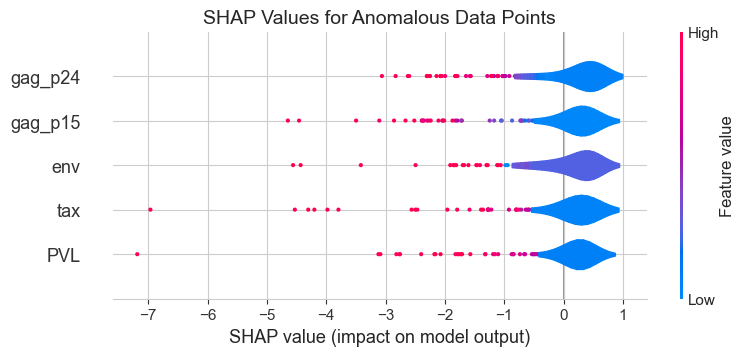

In [99]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_carrier, show=False, plot_type='violin')
plt.title('SHAP Values for Anomalous Data Points', fontsize=14)
plt.show()

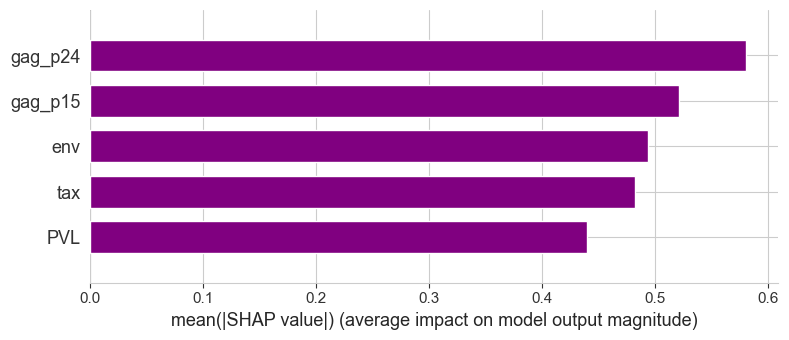

In [100]:
#fig, ax = plt.subplots(dpi=300)
shap.summary_plot(shap_values, X_carrier, plot_type='bar', color= 'purple', show=False)
plt.savefig('summary_plot.png', bbox_inches='tight')
plt.show()

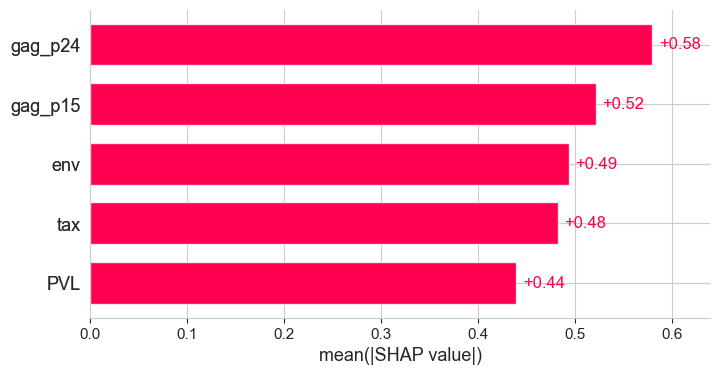

In [101]:
# shap summary plot
shap.plots.bar(shap_values,show=False)
plt.savefig('summary_plot.png', bbox_inches='tight', dpi=500)
plt.show()

In [102]:
len(shap_values), len(anomaly_scores)

(264, 264)

In [103]:
len(shap_values)

264

In [104]:
anomalous_data

,PVL,tax,env,gag_p15,gag_p24
indivID,,,,,
indiv0010,22.50,17410.000000,5097.000000,1540.000000,3.644769e+06
indiv0012,2.50,66612.000000,788.000000,256.000000,1.095728e+06
indiv0027,35.10,46360.600000,8036.570000,133435.500000,9.186793e+06
indiv0035,46.30,6257.360000,3380.860000,1392.000000,5.574657e+05
indiv0049,3.91,5803.662000,4416.000000,51426.477000,7.371510e+06
indiv0055,1.29,38118.972000,3910.400000,21345.528000,4.946663e+06
indiv0069,2.73,5475.765000,6935.648000,334938.483000,1.029821e+07
indiv0070,0.34,66137.340000,2501.280000,493.614000,2.403575e+06
indiv0075,1.79,7473.845000,3674.720000,56884.113000,7.233097e+06


## Holdout Samples HAM_Marianna

In [105]:
clean_df.head()

,PVL,tax,env,gag_p15,gag_p24,type,target
indivID,,,,,,,
indiv0001,4.6,520.0,272.0,260.0,13909.0,Carrier,0
indiv0002,0.2,1628.0,126.0,172.0,6809.0,Carrier,0
indiv0003,0.1,2238.0,290.0,156.0,761360.0,Carrier,0
indiv0004,1.2,4787.0,726.0,422.0,603196.0,Carrier,0
indiv0005,7.5,912.0,2292.0,278.0,792544.0,Carrier,0


In [106]:
len(clean_df)

433

In [107]:
clean_df['type'].value_counts()

Carrier         234
HAM_Marianna     94
HAM              56
ATL              49
Name: type, dtype: int64

In [108]:
#clean_df.sample(frac=1)

In [109]:
random_seed = 0

In [110]:
sample_sizes = {'HAM_Marianna': 94}

In [111]:
ham_hold = pd.DataFrame(columns= clean_df.columns)

In [112]:
# HAM Holdout set
for type_label, sample_size in sample_sizes.items():
    # Filter the df to select samples of the current 'type'
    type_samples = clean_df[clean_df['type'] == type_label]
    
    # random sampling with replacement
    selected_samples= type_samples.sample(n=sample_size, random_state=42)
    
    # Append the ham_marianna samples to the holdout df
    ham_hold = ham_hold.append(selected_samples, ignore_index=False)
        
    # remove the ham_marianna samples from the original df
    clean_df = clean_df.drop(selected_samples.index)

In [113]:
ham_hold['type'].value_counts()

HAM_Marianna    94
Name: type, dtype: int64

In [114]:
clean_df.shape

(339, 7)

In [115]:
clean_df['type'].value_counts()

Carrier    234
HAM         56
ATL         49
Name: type, dtype: int64

## Undersampling carriers

In [116]:
# random resampling from carrier
df_carrier = clean_df[clean_df['type'] == 'Carrier']
df_ham = clean_df[clean_df['type'] == 'HAM']
df_atl = clean_df[clean_df['type'] == 'ATL']

# Downsample the Carrier
df_carrier_ds = df_carrier.sample(n=184, random_state=98) 

# Combine downsampled dataframe with other classes
clean_df_balanced = pd.concat([df_carrier_ds, df_ham, df_atl])

In [117]:
clean_df_balanced['type'].value_counts()

Carrier    184
HAM         56
ATL         49
Name: type, dtype: int64

In [118]:
clean_df_balanced.shape

(289, 7)

### RF_model_optimization

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [120]:
#clean_df.head()

In [121]:
#clean_df['type'].value_counts()

In [122]:
# Separate the features and targets
#X = clean_df.drop(['type', 'target'], axis=1)
#y = clean_df['target']

In [123]:
clean_df_balanced['type'].value_counts()

Carrier    184
HAM         56
ATL         49
Name: type, dtype: int64

In [124]:
clean_df_balanced.shape

(289, 7)

In [125]:
# Separate the features and targets
X = clean_df_balanced.drop(['type', 'target'], axis=1)
y = clean_df_balanced['target']

In [126]:
len(y)

289

In [127]:
total_samples = len(y)
weight_carrier = total_samples / (3 * 184)
weight_atl = total_samples / (3 * 49)
weight_ham = total_samples / (3 * 56)

In [128]:
class_weights = {0: weight_carrier, 1: weight_atl, 2: weight_ham}

In [129]:
weight_carrier, weight_atl, weight_ham

(0.5235507246376812, 1.965986394557823, 1.7202380952380953)

In [130]:
# Define Random Forest
model = RandomForestClassifier(class_weight=class_weights, random_state=42)

In [131]:
# Define param grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

In [132]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

In [133]:
# Stratified K-fold cross-validation
k =8
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [134]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [135]:
# Mean ROC AUC for each class
mean_roc_auc_scores = []

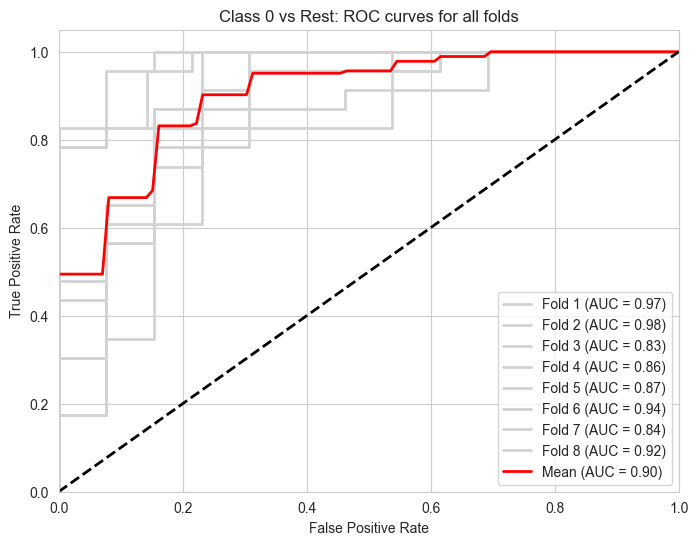

Class 0: Mean ROC AUC = 0.90


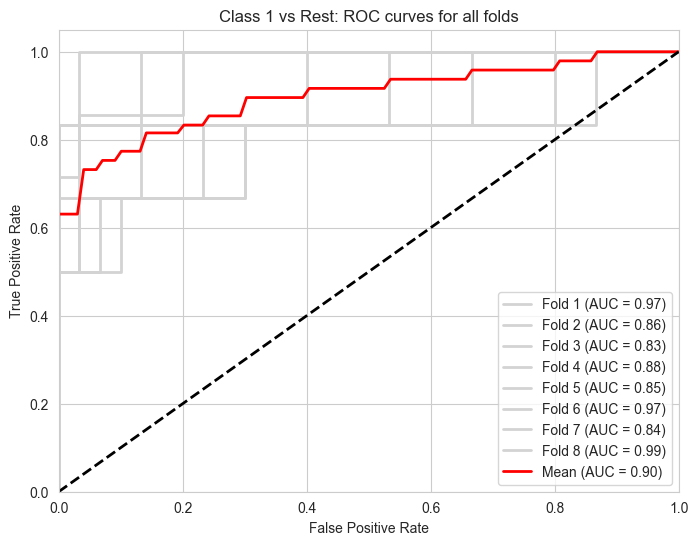

Class 1: Mean ROC AUC = 0.90


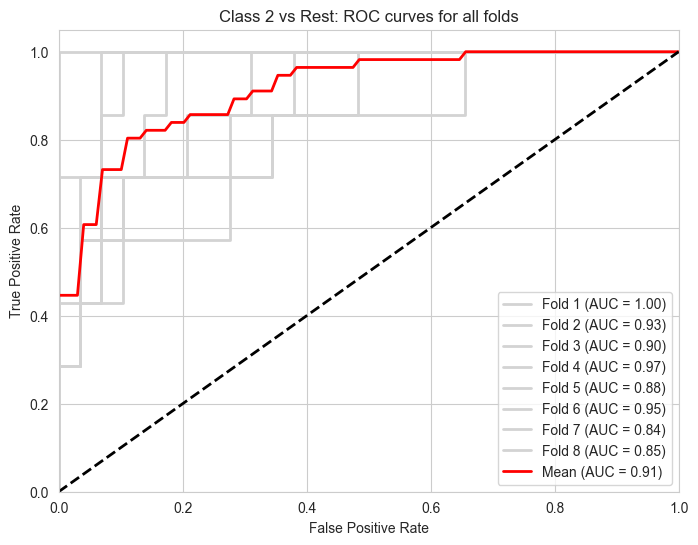

Class 2: Mean ROC AUC = 0.91


In [136]:
# Calculate ROC curve and ROC AUC for each class
for class_idx in range(len(np.unique(y))):
    plt.figure(figsize=(8, 6))

    roc_auc_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)

    for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # perform Grid-search & get the best model with SKF-CV
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=skf, scoring='f1_macro', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred_proba = best_model.predict_proba(X_test)
        y_bin = label_binarize(y_test, classes=np.unique(y))

        fpr, tpr, _ = roc_curve(y_bin[:, class_idx], y_pred_proba[:, class_idx])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)

        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        plt.plot(fpr, tpr, color='lightgrey', lw=2, label=f'Fold {fold_idx} (AUC = {roc_auc:.2f})')

    mean_tpr /= skf.get_n_splits()
    mean_roc_auc = np.mean(roc_auc_scores)
    mean_roc_auc_scores.append(mean_roc_auc)

    plt.plot(mean_fpr, mean_tpr, color='red', lw=2, label=f'Mean (AUC = {mean_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Class {class_idx} vs Rest: ROC curves for all folds')
    plt.legend(loc='lower right')
    plt.show()

    print(f"Class {class_idx}: Mean ROC AUC = {mean_roc_auc:.2f}")

In [137]:
# Overall Mean ROC AUC across all classes
overall_mean_roc_auc = np.mean(mean_roc_auc_scores)
print(f"Overall Mean ROC AUC across all classes: {overall_mean_roc_auc:.2f}")

Overall Mean ROC AUC across all classes: 0.91


In [138]:
# Get the optimized parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [139]:
print("Best Hyperparameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500}
Best F1 Macro Score: 0.7649503988153474


In [140]:
best_model

RandomForestClassifier(class_weight={0: 0.5235507246376812,
                                     1: 1.965986394557823,
                                     2: 1.7202380952380953},
                       max_depth=10, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [143]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Test the anomalies

In [173]:
X_test_anomaly = anomalous_data.copy()

In [174]:
X_test_anomaly

,PVL,tax,env,gag_p15,gag_p24
indivID,,,,,
indiv0010,22.50,17410.000000,5097.000000,1540.000000,3.644769e+06
indiv0012,2.50,66612.000000,788.000000,256.000000,1.095728e+06
indiv0027,35.10,46360.600000,8036.570000,133435.500000,9.186793e+06
indiv0035,46.30,6257.360000,3380.860000,1392.000000,5.574657e+05
indiv0049,3.91,5803.662000,4416.000000,51426.477000,7.371510e+06
indiv0055,1.29,38118.972000,3910.400000,21345.528000,4.946663e+06
indiv0069,2.73,5475.765000,6935.648000,334938.483000,1.029821e+07
indiv0070,0.34,66137.340000,2501.280000,493.614000,2.403575e+06
indiv0075,1.79,7473.845000,3674.720000,56884.113000,7.233097e+06


In [175]:
len(X_test_anomaly)

30

In [176]:
X_test_anomaly_copy = X_test_anomaly.copy()

In [177]:
#X_test_anomaly_copy.drop('gag_p19', axis=1, inplace=True)

In [178]:
X_test_anomaly_copy.head()

,PVL,tax,env,gag_p15,gag_p24
indivID,,,,,
indiv0010,22.50,17410.000,5097.00,1540.000,3644769.000
indiv0012,2.50,66612.000,788.00,256.000,1095728.000
indiv0027,35.10,46360.600,8036.57,133435.500,9186793.000
indiv0035,46.30,6257.360,3380.86,1392.000,557465.700
indiv0049,3.91,5803.662,4416.00,51426.477,7371510.272


In [179]:
X_test_anomaly_copy.columns

Index(['PVL', 'tax', 'env', 'gag_p15', 'gag_p24'], dtype='object')

In [180]:
# Perform prediction on X_test_anomaly
y_pred_anomaly = best_model.predict(X_test_anomaly_copy)

In [181]:
y_pred_anomaly

array([1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2])

In [182]:
#sns.set_style('whitegrid')
sns.set(style="ticks")

In [183]:
# Create a new dataframe for the final test data
X_test_anomaly_result = pd.DataFrame(data=X_test_anomaly_copy, columns=X_test_anomaly_copy.columns)

# Adding a new column for the predicted classification results
X_test_anomaly_result['Predicted_class'] = ['ATL' if pred == 1 else ('HAM' if pred == 2 else 'Carrier') for pred in y_pred_anomaly]

In [184]:
#X_test_anomaly_result

In [185]:
X_test_anomaly_result['Predicted_class'].value_counts()

HAM        22
ATL         4
Carrier     4
Name: Predicted_class, dtype: int64

In [186]:
X_test_anomaly_result

,PVL,tax,env,gag_p15,gag_p24,Predicted_class
indivID,,,,,,
indiv0010,22.50,17410.000000,5097.000000,1540.000000,3.644769e+06,ATL
indiv0012,2.50,66612.000000,788.000000,256.000000,1.095728e+06,HAM
indiv0027,35.10,46360.600000,8036.570000,133435.500000,9.186793e+06,HAM
indiv0035,46.30,6257.360000,3380.860000,1392.000000,5.574657e+05,ATL
indiv0049,3.91,5803.662000,4416.000000,51426.477000,7.371510e+06,HAM
indiv0055,1.29,38118.972000,3910.400000,21345.528000,4.946663e+06,HAM
indiv0069,2.73,5475.765000,6935.648000,334938.483000,1.029821e+07,HAM
indiv0070,0.34,66137.340000,2501.280000,493.614000,2.403575e+06,Carrier
indiv0075,1.79,7473.845000,3674.720000,56884.113000,7.233097e+06,HAM


In [187]:
len(X_test_anomaly_result)

30

### Predicted probability of HAM_Anomaly test set

In [188]:
X_test_anomaly

,PVL,tax,env,gag_p15,gag_p24
indivID,,,,,
indiv0010,22.50,17410.000000,5097.000000,1540.000000,3.644769e+06
indiv0012,2.50,66612.000000,788.000000,256.000000,1.095728e+06
indiv0027,35.10,46360.600000,8036.570000,133435.500000,9.186793e+06
indiv0035,46.30,6257.360000,3380.860000,1392.000000,5.574657e+05
indiv0049,3.91,5803.662000,4416.000000,51426.477000,7.371510e+06
indiv0055,1.29,38118.972000,3910.400000,21345.528000,4.946663e+06
indiv0069,2.73,5475.765000,6935.648000,334938.483000,1.029821e+07
indiv0070,0.34,66137.340000,2501.280000,493.614000,2.403575e+06
indiv0075,1.79,7473.845000,3674.720000,56884.113000,7.233097e+06


In [189]:
len(X_test_anomaly)

30

In [190]:
X_test_anomaly_pp = X_test_anomaly.copy()

In [191]:
X_test_anomaly_pp

,PVL,tax,env,gag_p15,gag_p24
indivID,,,,,
indiv0010,22.50,17410.000000,5097.000000,1540.000000,3.644769e+06
indiv0012,2.50,66612.000000,788.000000,256.000000,1.095728e+06
indiv0027,35.10,46360.600000,8036.570000,133435.500000,9.186793e+06
indiv0035,46.30,6257.360000,3380.860000,1392.000000,5.574657e+05
indiv0049,3.91,5803.662000,4416.000000,51426.477000,7.371510e+06
indiv0055,1.29,38118.972000,3910.400000,21345.528000,4.946663e+06
indiv0069,2.73,5475.765000,6935.648000,334938.483000,1.029821e+07
indiv0070,0.34,66137.340000,2501.280000,493.614000,2.403575e+06
indiv0075,1.79,7473.845000,3674.720000,56884.113000,7.233097e+06


In [192]:
# Probability predictions of the HAM positive class
y_prob_anomaly = best_model.predict_proba(X_test_anomaly_pp)[:,2]

In [193]:
# Create a new dataframe with probability predictions
anomaly_pred_result = pd.DataFrame(data= X_test_anomaly_pp)
anomaly_pred_result['probability_positive_HAM'] = y_prob_anomaly

In [194]:
anomaly_pred_result.head()

,PVL,tax,env,gag_p15,gag_p24,probability_positive_HAM
indivID,,,,,,
indiv0010,22.50,17410.000,5097.00,1540.000,3644769.000,0.340544
indiv0012,2.50,66612.000,788.00,256.000,1095728.000,0.701290
indiv0027,35.10,46360.600,8036.57,133435.500,9186793.000,0.663833
indiv0035,46.30,6257.360,3380.86,1392.000,557465.700,0.026614
indiv0049,3.91,5803.662,4416.00,51426.477,7371510.272,0.694682


In [195]:
#Pearsons correlation coefficient
apdh = anomaly_pred_result.corr()

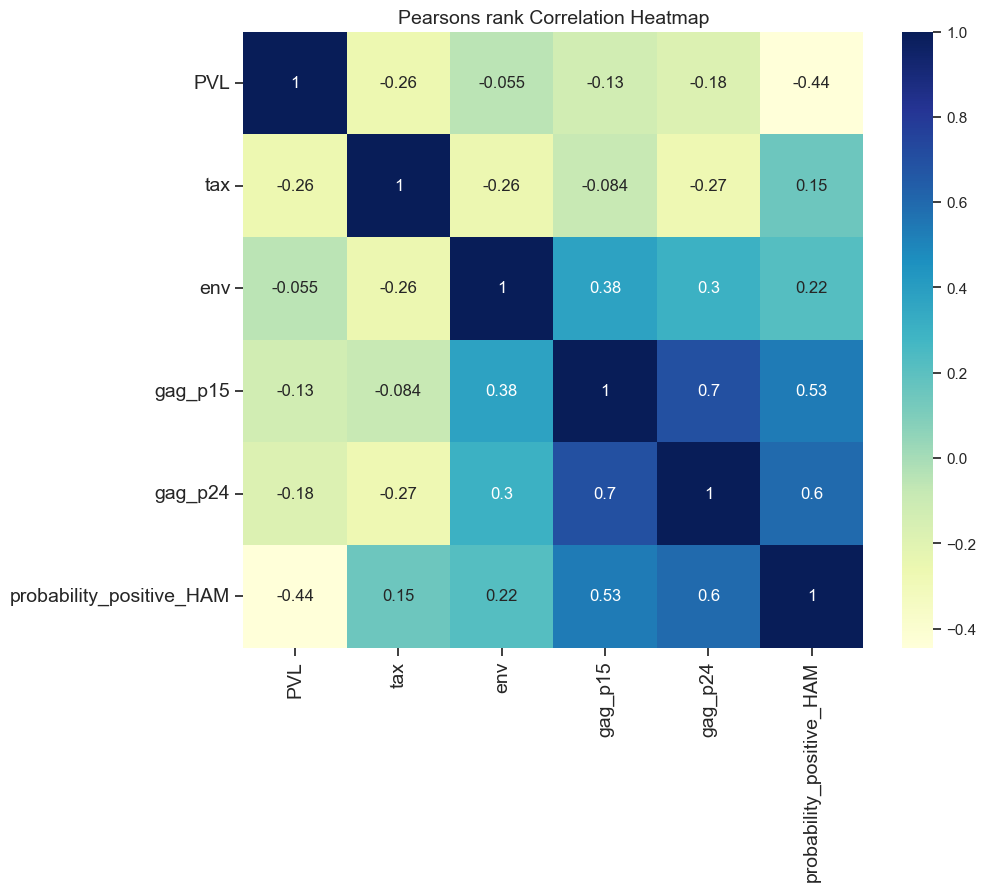

In [196]:
#PCC heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(apdh, cmap='YlGnBu', annot=True, annot_kws={'size': 12}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
plt.title('Pearsons rank Correlation Heatmap', fontsize=14)
plt.show()

In [198]:
sns.set_style('whitegrid')

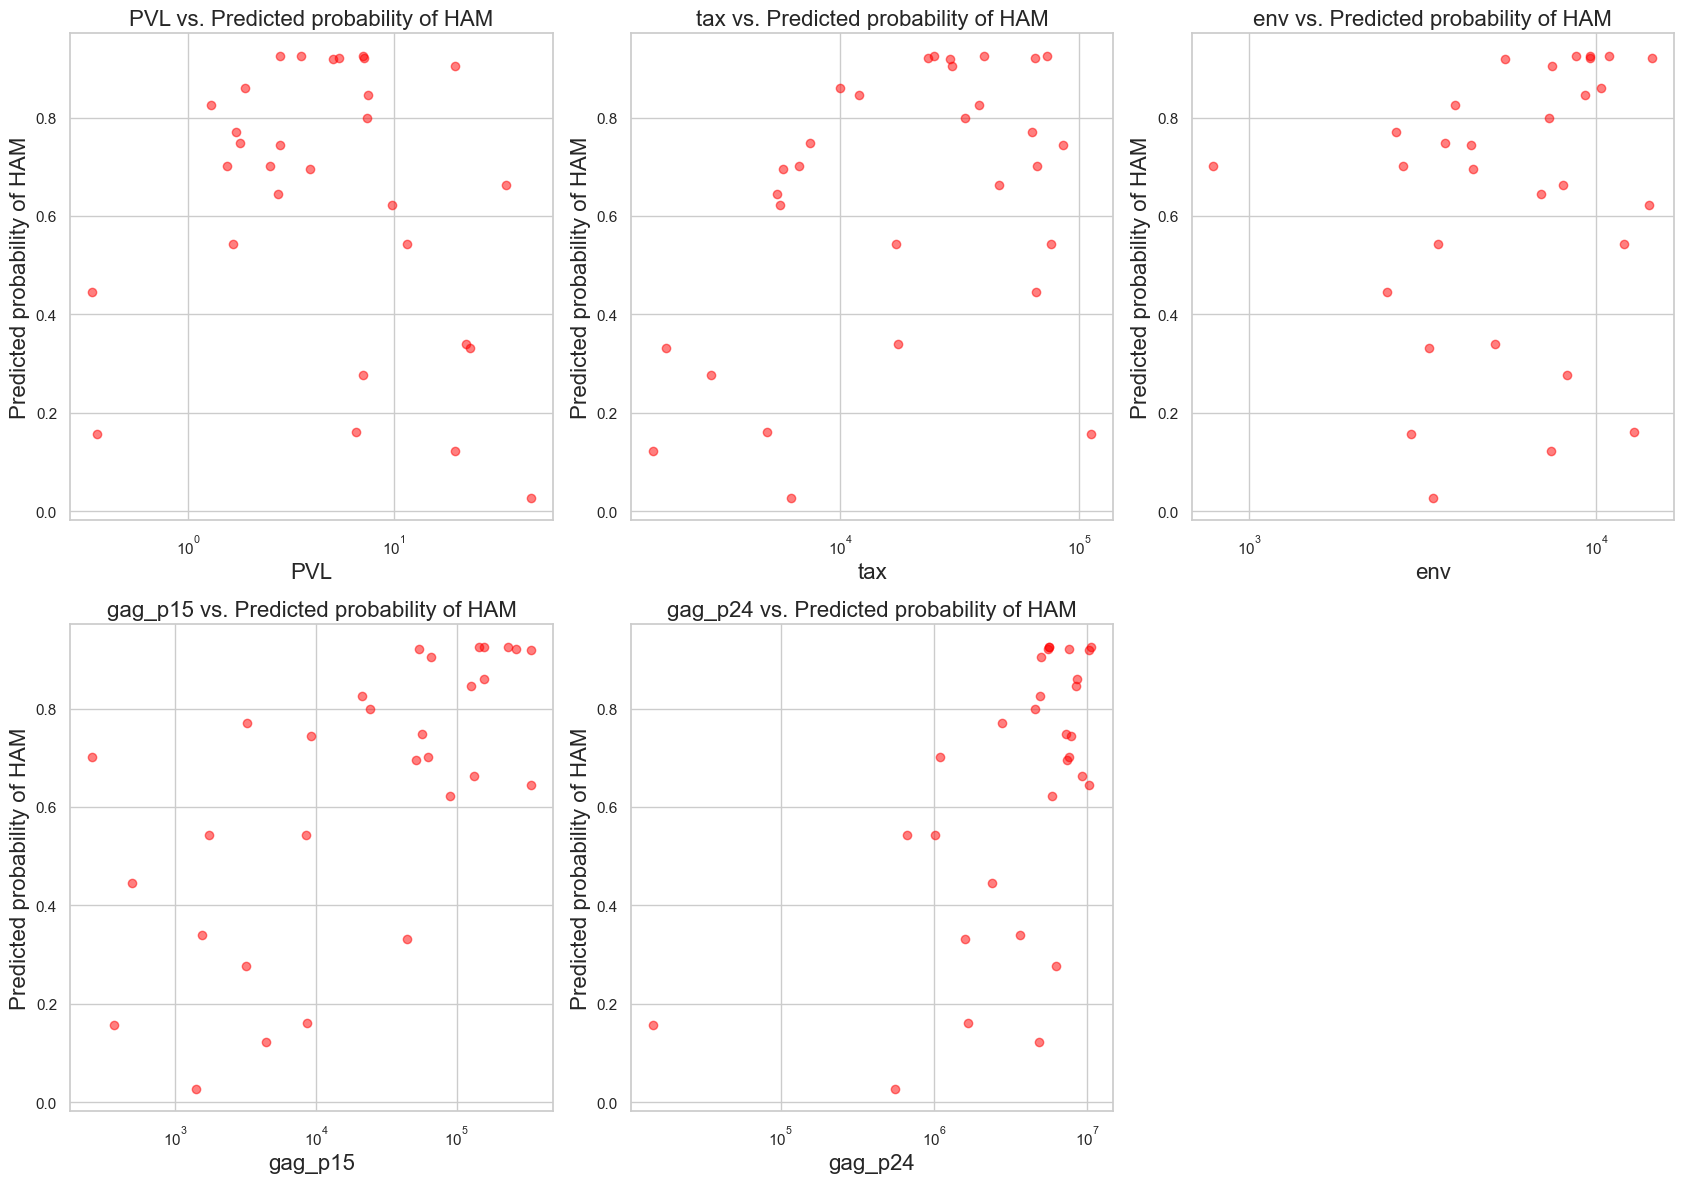

In [199]:
### HAM
# List of numerical features
numerical_features = ['PVL', 'tax', 'env', 'gag_p15', 'gag_p24']

# Create subplots for each feature
plt.figure(figsize=(17, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i) 
    plt.scatter(anomaly_pred_result[feature], anomaly_pred_result['probability_positive_HAM'], color='red', alpha=0.5)
    plt.xscale('log')
    plt.xlabel(feature, fontsize= 16)
    plt.ylabel('Predicted probability of HAM', fontsize=16)
    plt.title(f'{feature} vs. Predicted probability of HAM', fontsize=16)

plt.tight_layout()
plt.show()

### HAM_Marianna test set

In [200]:
import sklearn.metrics as metrics

In [201]:
ham_hold

,PVL,tax,env,gag_p15,gag_p24,type,target
HAM227,2.01,5271.721500,6458.48840,43103.180340,1.627181e+06,HAM_Marianna,2
HAM175,1.50,8130.546781,7551.46336,10194.386960,3.113093e+06,HAM_Marianna,2
HAM284,3.67,8974.045450,9410.94024,145667.947600,6.793647e+06,HAM_Marianna,2
HAM386,7.57,44438.794410,6486.87736,15100.815390,2.039919e+06,HAM_Marianna,2
HAM031,0.30,6511.466367,4158.98264,1963.543424,7.214016e+05,HAM_Marianna,2
HAM185,3.95,654.420600,9141.24512,4007.281072,2.187422e+06,HAM_Marianna,2
HAM219,1.34,1081.005880,4542.23360,442.283296,7.276670e+06,HAM_Marianna,2
HAM344,1.43,26184.095340,8459.91008,4602.662432,4.602946e+06,HAM_Marianna,2
HAM147,3.68,32605.807290,10787.80480,65343.711790,7.544858e+06,HAM_Marianna,2
HAM247,10.19,57358.753700,10943.94408,364225.154500,6.444998e+06,HAM_Marianna,2


In [202]:
ham_test = ham_hold.copy()

In [203]:
X_hold = ham_test.drop(['type', 'target'], axis=1)
y_hold = ham_test['target']

In [207]:
# Perform prediction on X_test_anomaly
y_pred_ham = best_model.predict(X_hold)

In [208]:
y_pred_ham

array([2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 2])

In [209]:
# Create a new dataframe for the final test data
ham_test_result = pd.DataFrame(data=ham_test, columns=ham_test.columns)

# Adding a new column for the predicted classification results
ham_test_result['Predicted_class'] = ['ATL' if pred == 1 else ('HAM' if pred == 2 else 'Carrier') for pred in y_pred_ham]

In [210]:
ham_test_result

,PVL,tax,env,gag_p15,gag_p24,type,target,Predicted_class
HAM227,2.01,5271.721500,6458.48840,43103.180340,1.627181e+06,HAM_Marianna,2,HAM
HAM175,1.50,8130.546781,7551.46336,10194.386960,3.113093e+06,HAM_Marianna,2,Carrier
HAM284,3.67,8974.045450,9410.94024,145667.947600,6.793647e+06,HAM_Marianna,2,HAM
HAM386,7.57,44438.794410,6486.87736,15100.815390,2.039919e+06,HAM_Marianna,2,HAM
HAM031,0.30,6511.466367,4158.98264,1963.543424,7.214016e+05,HAM_Marianna,2,Carrier
HAM185,3.95,654.420600,9141.24512,4007.281072,2.187422e+06,HAM_Marianna,2,Carrier
HAM219,1.34,1081.005880,4542.23360,442.283296,7.276670e+06,HAM_Marianna,2,Carrier
HAM344,1.43,26184.095340,8459.91008,4602.662432,4.602946e+06,HAM_Marianna,2,HAM
HAM147,3.68,32605.807290,10787.80480,65343.711790,7.544858e+06,HAM_Marianna,2,HAM
HAM247,10.19,57358.753700,10943.94408,364225.154500,6.444998e+06,HAM_Marianna,2,HAM


In [211]:
ham_test_result['Predicted_class'].value_counts()

HAM        69
Carrier    25
Name: Predicted_class, dtype: int64

In [283]:
# calculate sensitivity
true_positive = 69
false_negative = 25

sensitivity = true_positive/ (true_positive + false_negative)
print(f"Sensitivity (Recall) of the classifier for 'HAM': {sensitivity: .2f}")

Sensitivity (Recall) of the classifier for 'HAM':  0.73


### Predicted Probability of HAM for HAM_Marianna set

In [214]:
ham_test_pp = ham_hold.copy()

In [215]:
ham_test_pp

,PVL,tax,env,gag_p15,gag_p24,type,target
HAM227,2.01,5271.721500,6458.48840,43103.180340,1.627181e+06,HAM_Marianna,2
HAM175,1.50,8130.546781,7551.46336,10194.386960,3.113093e+06,HAM_Marianna,2
HAM284,3.67,8974.045450,9410.94024,145667.947600,6.793647e+06,HAM_Marianna,2
HAM386,7.57,44438.794410,6486.87736,15100.815390,2.039919e+06,HAM_Marianna,2
HAM031,0.30,6511.466367,4158.98264,1963.543424,7.214016e+05,HAM_Marianna,2
HAM185,3.95,654.420600,9141.24512,4007.281072,2.187422e+06,HAM_Marianna,2
HAM219,1.34,1081.005880,4542.23360,442.283296,7.276670e+06,HAM_Marianna,2
HAM344,1.43,26184.095340,8459.91008,4602.662432,4.602946e+06,HAM_Marianna,2
HAM147,3.68,32605.807290,10787.80480,65343.711790,7.544858e+06,HAM_Marianna,2
HAM247,10.19,57358.753700,10943.94408,364225.154500,6.444998e+06,HAM_Marianna,2


In [216]:
ham_test_pp.drop(['type', 'target'], axis=1, inplace=True)

In [217]:
ham_test_pp.shape

(94, 5)

In [218]:
# Probability predictions of the HAM positive class
y_proba_ham = best_model.predict_proba(ham_test_pp)[:,2]

In [219]:
# Create a new dataframe with probability predictions
ham_pred_result = pd.DataFrame(data= ham_test_pp)
ham_pred_result['probability_positive_HAM'] = y_proba_ham

In [220]:
ham_pred_result

,PVL,tax,env,gag_p15,gag_p24,probability_positive_HAM
HAM227,2.01,5271.721500,6458.48840,43103.180340,1.627181e+06,0.492710
HAM175,1.50,8130.546781,7551.46336,10194.386960,3.113093e+06,0.213088
HAM284,3.67,8974.045450,9410.94024,145667.947600,6.793647e+06,0.818449
HAM386,7.57,44438.794410,6486.87736,15100.815390,2.039919e+06,0.557181
HAM031,0.30,6511.466367,4158.98264,1963.543424,7.214016e+05,0.051865
HAM185,3.95,654.420600,9141.24512,4007.281072,2.187422e+06,0.071473
HAM219,1.34,1081.005880,4542.23360,442.283296,7.276670e+06,0.293437
HAM344,1.43,26184.095340,8459.91008,4602.662432,4.602946e+06,0.724410
HAM147,3.68,32605.807290,10787.80480,65343.711790,7.544858e+06,0.942800
HAM247,10.19,57358.753700,10943.94408,364225.154500,6.444998e+06,0.921669


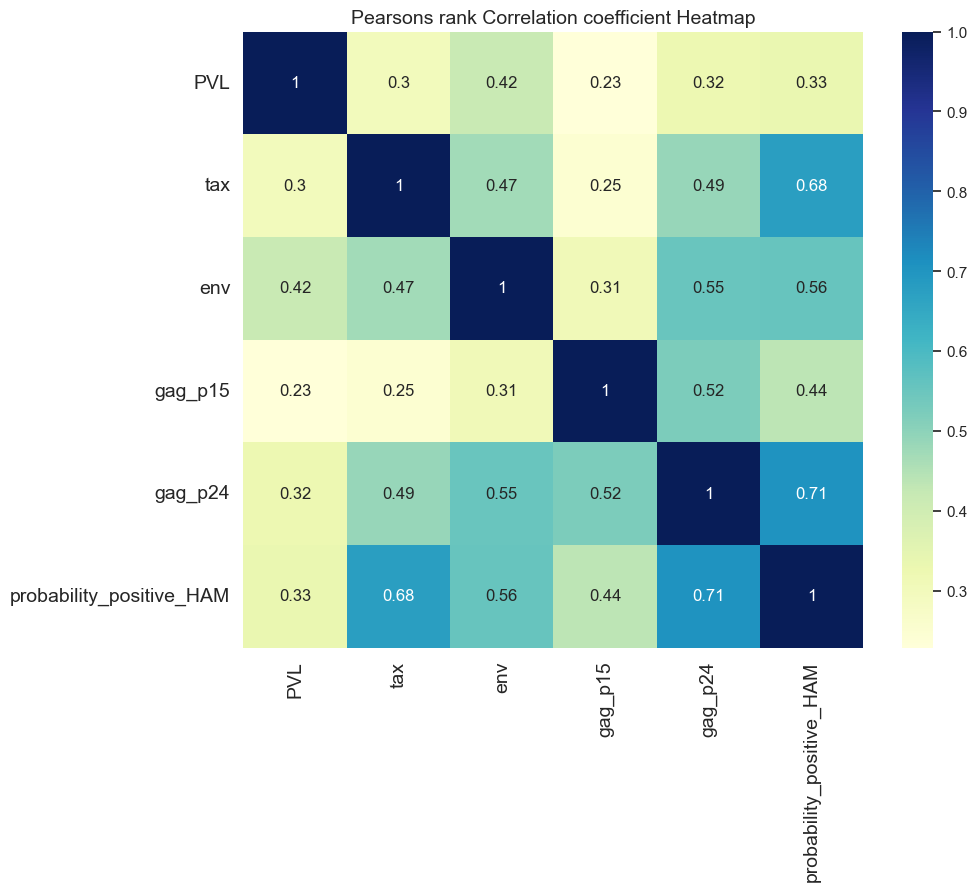

In [221]:
#PCC & visualization
ahdh = ham_pred_result.corr()
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(ahdh, cmap='YlGnBu', annot=True, annot_kws={'size': 12}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
plt.title('Pearsons rank Correlation coefficient Heatmap', fontsize=14)
plt.show()

In [222]:
sns.set_style('whitegrid')

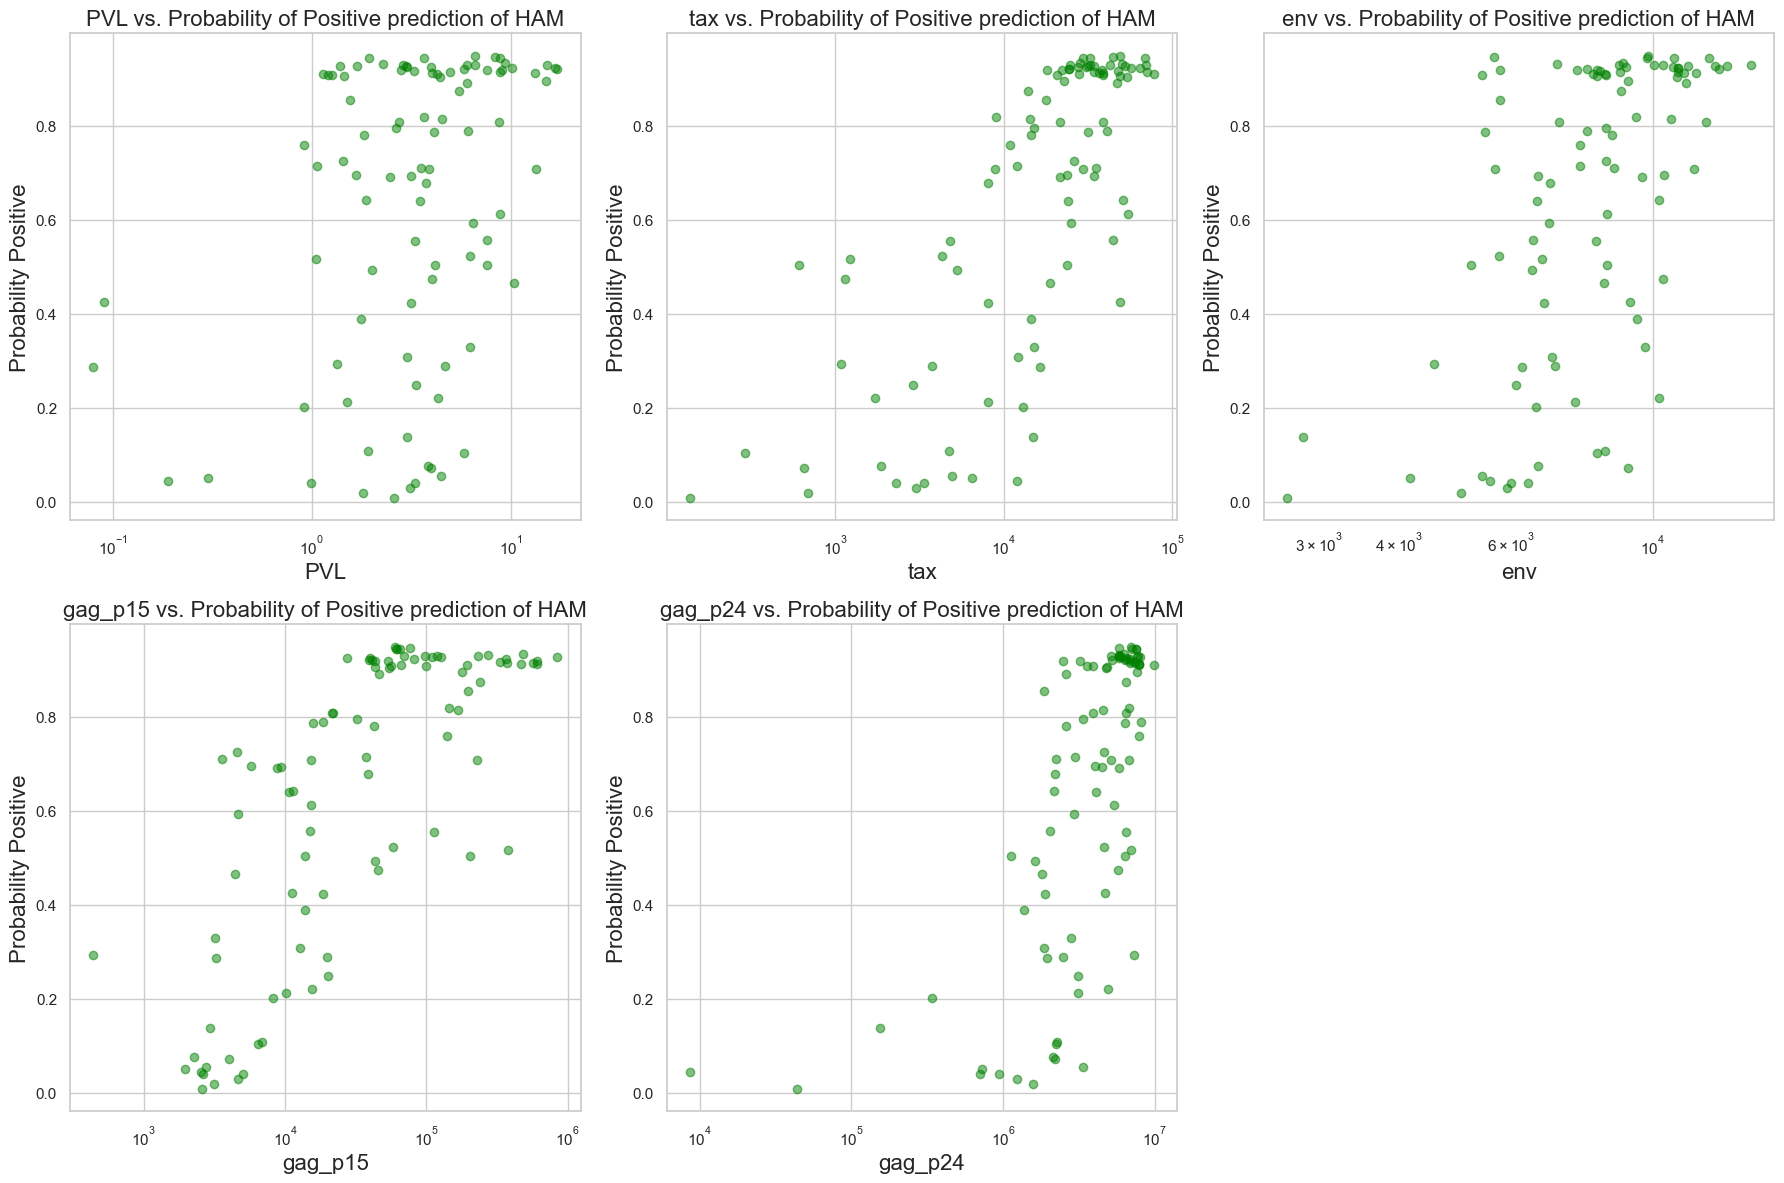

In [223]:
### Predicted probability of HAM
# numerical features
numerical_features = ['PVL', 'tax', 'env', 'gag_p15', 'gag_p24']

# subplots for each feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i) 
    plt.scatter(ham_pred_result[feature], ham_pred_result['probability_positive_HAM'], color='green', alpha=0.5)
    plt.xscale('log')
    plt.xlabel(feature, fontsize= 16)
    plt.ylabel('Probability Positive', fontsize=16)
    plt.title(f'{feature} vs. Probability of Positive prediction of HAM', fontsize=16)

plt.tight_layout()
plt.show()